In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [3]:
calibrated_no2_allsites = pd.read_csv("data/no2_calibrated.csv")
reference_no2_ep = pd.read_csv("data/ep_no2_2023.csv")

In [4]:
calibrated_no2_allsites.head()

,local_timestamp,251_no2,259_no2,256_no2,265_no2,264_no2,255_no2,271_no2,254_no2,263_no2,...,257_no2,269_no2,258_no2,267_no2,253_no2,274_no2,260_no2,262_no2,266_no2,261_no2
0,2023-01-01 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01 01:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01 02:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01 03:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01 04:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
reference_no2_ep.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,date_local,...,detection_limit,uncertainty,qualifier,method_type,method,method_code,state,county,date_of_last_change,cbsa_code
0,44,7,1010,42602,1,41.841039,-71.36097,NAD83,Nitrogen dioxide (NO2),2023-04-19,...,0.05,NaN,AZ - Q C Audit.,FRM,Instrumental - Chemiluminescence Thermo Electr...,574,Rhode Island,Providence,2023-07-11,39300
1,44,7,1010,42602,1,41.841039,-71.36097,NAD83,Nitrogen dioxide (NO2),2023-04-19,...,0.05,NaN,AZ - Q C Audit.,FRM,Instrumental - Chemiluminescence Thermo Electr...,574,Rhode Island,Providence,2023-07-11,39300
2,44,7,1010,42602,1,41.841039,-71.36097,NAD83,Nitrogen dioxide (NO2),2023-04-19,...,0.05,NaN,AZ - Q C Audit.,FRM,Instrumental - Chemiluminescence Thermo Electr...,574,Rhode Island,Providence,2023-07-11,39300
3,44,7,1010,42602,1,41.841039,-71.36097,NAD83,Nitrogen dioxide (NO2),2023-04-19,...,0.05,NaN,AZ - Q C Audit.,FRM,Instrumental - Chemiluminescence Thermo Electr...,574,Rhode Island,Providence,2023-07-11,39300
4,44,7,1010,42602,1,41.841039,-71.36097,NAD83,Nitrogen dioxide (NO2),2023-04-19,...,0.05,NaN,AZ - Q C Audit.,FRM,Instrumental - Chemiluminescence Thermo Electr...,574,Rhode Island,Providence,2023-07-11,39300


## Begin by cleaning and understanding calibrated NO2 data from Yishu

In [6]:
#we are only going to look at EP NO2 data for now
columns = ["local_timestamp", "250_no2"]
calibrated_no2_EP = calibrated_no2_allsites[columns]
calibrated_no2_EP.head()

,local_timestamp,250_no2
0,2023-01-01 00:00:00-05:00,NaN
1,2023-01-01 01:00:00-05:00,NaN
2,2023-01-01 02:00:00-05:00,NaN
3,2023-01-01 03:00:00-05:00,NaN
4,2023-01-01 04:00:00-05:00,NaN


In [7]:
calibrated_no2_EP["local_timestamp"] = pd.to_datetime(calibrated_no2_EP["local_timestamp"], utc=True)
calibrated_no2_EP["datetime_utc"] = calibrated_no2_EP["local_timestamp"].dt.tz_convert("UTC")

cutoff = pd.Timestamp("2023-12-31 23:00:00", tz="UTC")
calibrated_no2_EP = calibrated_no2_EP[calibrated_no2_EP["datetime_utc"] <= cutoff]

calibrated_no2_EP.sort_values("datetime_utc", inplace=True)
calibrated_no2_EP.reset_index(drop=True, inplace=True)

calibrated_no2_EP.head()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_14901/1905543782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibrated_no2_EP["local_timestamp"] = pd.to_datetime(calibrated_no2_EP["local_timestamp"], utc=True)
/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_14901/1905543782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calibrated_no2_EP["datetime_utc"] = calibrated_no2_EP["local_timestamp"].dt.tz_convert("UTC")


,local_timestamp,250_no2,datetime_utc
0,2023-01-01 05:00:00+00:00,NaN,2023-01-01 05:00:00+00:00
1,2023-01-01 06:00:00+00:00,NaN,2023-01-01 06:00:00+00:00
2,2023-01-01 07:00:00+00:00,NaN,2023-01-01 07:00:00+00:00
3,2023-01-01 08:00:00+00:00,NaN,2023-01-01 08:00:00+00:00
4,2023-01-01 09:00:00+00:00,NaN,2023-01-01 09:00:00+00:00


In [8]:
calibrated_no2_EP["250_no2"].describe()

count    7732.000000
mean        5.459427
std         5.386112
min        -9.853362
25%         2.356667
50%         3.963872
75%         6.562262
max        42.799299
Name: 250_no2, dtype: float64

In [9]:
num_null = int(calibrated_no2_EP["250_no2"].isnull().sum())
print("Number of null values: " + str(num_null))
print("Percentage of null values: " + str(num_null / len(calibrated_no2_EP["250_no2"]) * 100) + str("%"))

Number of null values: 445
Percentage of null values: 5.4420936773877955%


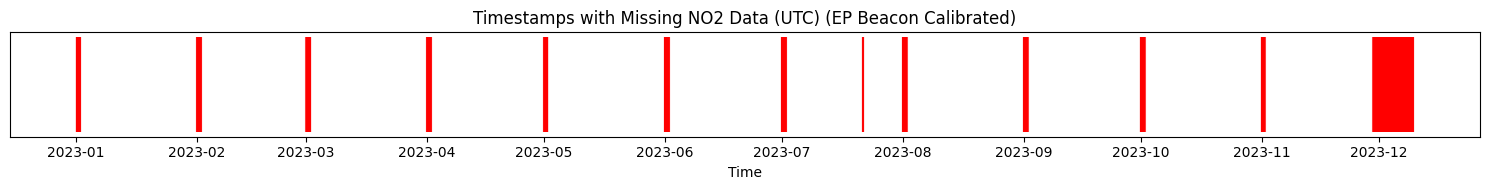

In [10]:
import matplotlib.dates as mdates

#understand missing data better
calibrated_no2_EP["missing"] = calibrated_no2_EP["250_no2"].isna()

missing_times = calibrated_no2_EP.loc[calibrated_no2_EP["missing"], "datetime_utc"]

plt.figure(figsize=(15, 2))
plt.vlines(missing_times, ymin=0, ymax=1, color="red", alpha=0.7)
plt.title("Timestamps with Missing NO2 Data (UTC) (EP Beacon Calibrated)")
plt.yticks([])
plt.xlabel("Time")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()



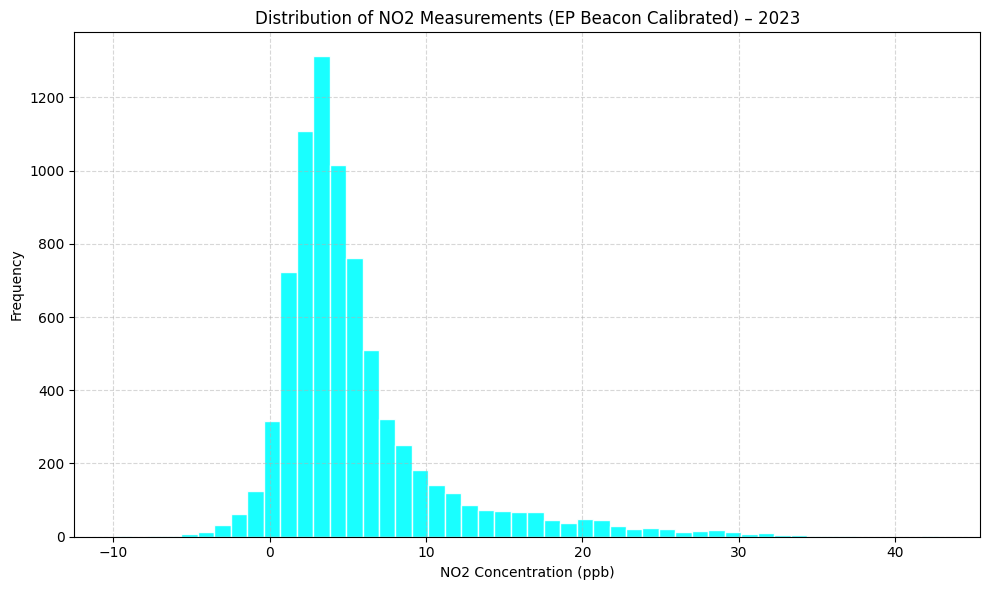

In [11]:
no2_values = calibrated_no2_EP["250_no2"].dropna()

plt.figure(figsize=(10, 6))
plt.hist(no2_values, bins=50, color="cyan", edgecolor="white", alpha=0.9)

plt.title("Distribution of NO2 Measurements (EP Beacon Calibrated) – 2023")
plt.xlabel("NO2 Concentration (ppb)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

plt.show()

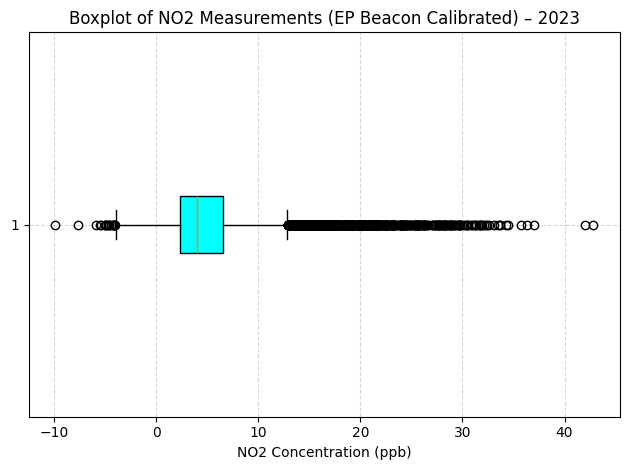

In [12]:
plt.boxplot(no2_values, vert=False, patch_artist=True,
            boxprops=dict(facecolor="cyan", color="black"))

plt.title("Boxplot of NO2 Measurements (EP Beacon Calibrated) – 2023")
plt.xlabel("NO2 Concentration (ppb)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

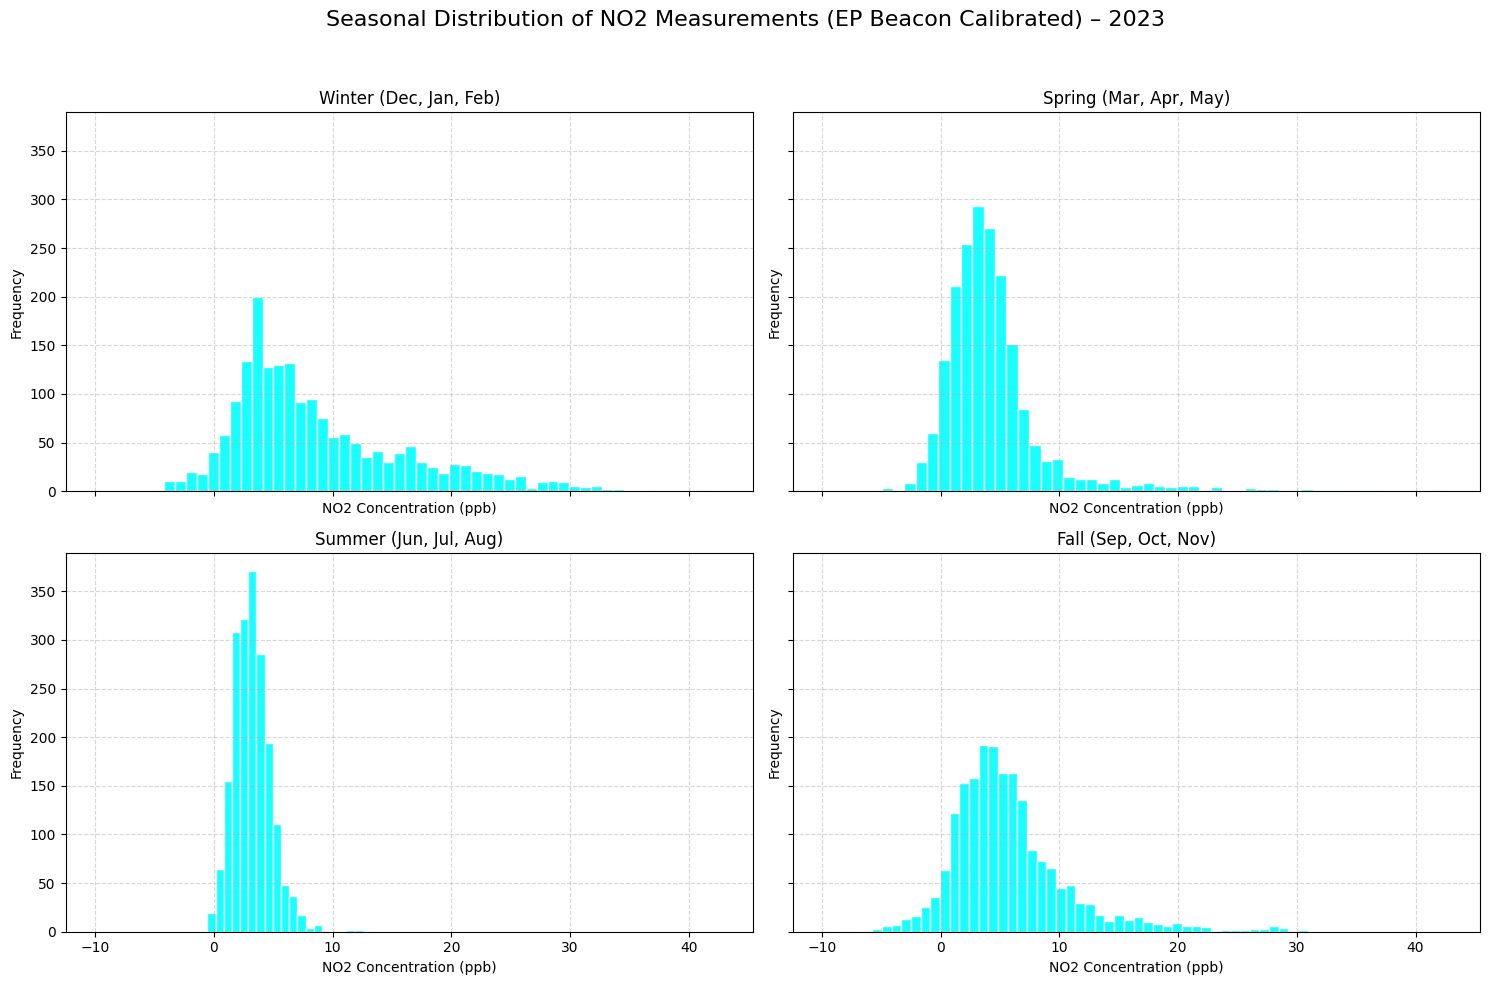

In [13]:
calibrated_no2_EP["month"] = calibrated_no2_EP["datetime_utc"].dt.month

winter = calibrated_no2_EP[calibrated_no2_EP["month"].isin([1, 2, 12])]
spring = calibrated_no2_EP[calibrated_no2_EP["month"].isin([3, 4, 5])]
summer = calibrated_no2_EP[calibrated_no2_EP["month"].isin([6, 7, 8])]
fall = calibrated_no2_EP[calibrated_no2_EP["month"].isin([9, 10, 11])]

winter_vals = winter["250_no2"].dropna()
spring_vals = spring["250_no2"].dropna()
summer_vals = summer["250_no2"].dropna()
fall_vals = fall["250_no2"].dropna()

fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

seasons = {
    "Winter (Dec, Jan, Feb)": winter_vals,
    "Spring (Mar, Apr, May)": spring_vals,
    "Summer (Jun, Jul, Aug)": summer_vals,
    "Fall (Sep, Oct, Nov)": fall_vals
}

axes = axes.flatten()

for i, (season, data) in enumerate(seasons.items()):
    bins = 50
    if "Summer" in season:
        bins = 20
    
    axes[i].hist(data, bins=bins, color="cyan", edgecolor="white", alpha=0.9)
    axes[i].set_title(season)
    axes[i].set_xlabel("NO2 Concentration (ppb)")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Seasonal Distribution of NO2 Measurements (EP Beacon Calibrated) – 2023", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_14901/2731030056.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(seasonal_data, vert=False, patch_artist=True,


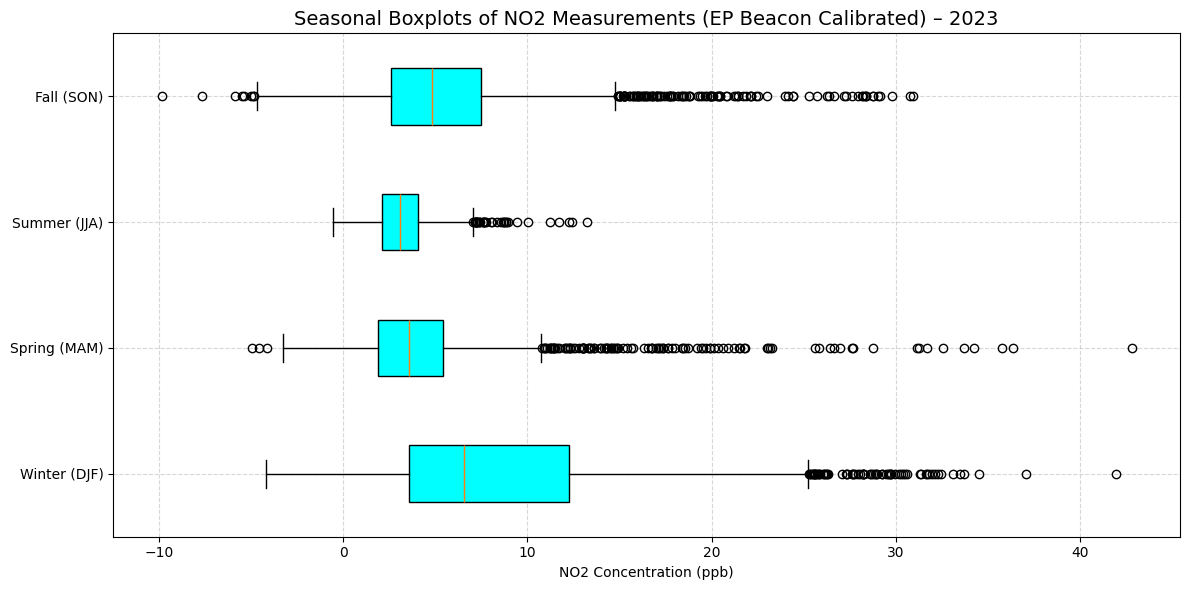

In [14]:
seasonal_data = [winter_vals, spring_vals, summer_vals, fall_vals]
season_labels = ["Winter (DJF)", "Spring (MAM)", "Summer (JJA)", "Fall (SON)"]


plt.figure(figsize=(12, 6))
plt.boxplot(seasonal_data, vert=False, patch_artist=True,
            labels=season_labels,
            boxprops=dict(facecolor="cyan", color="black"))

plt.title("Seasonal Boxplots of NO2 Measurements (EP Beacon Calibrated) – 2023", fontsize=14)
plt.xlabel("NO2 Concentration (ppb)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


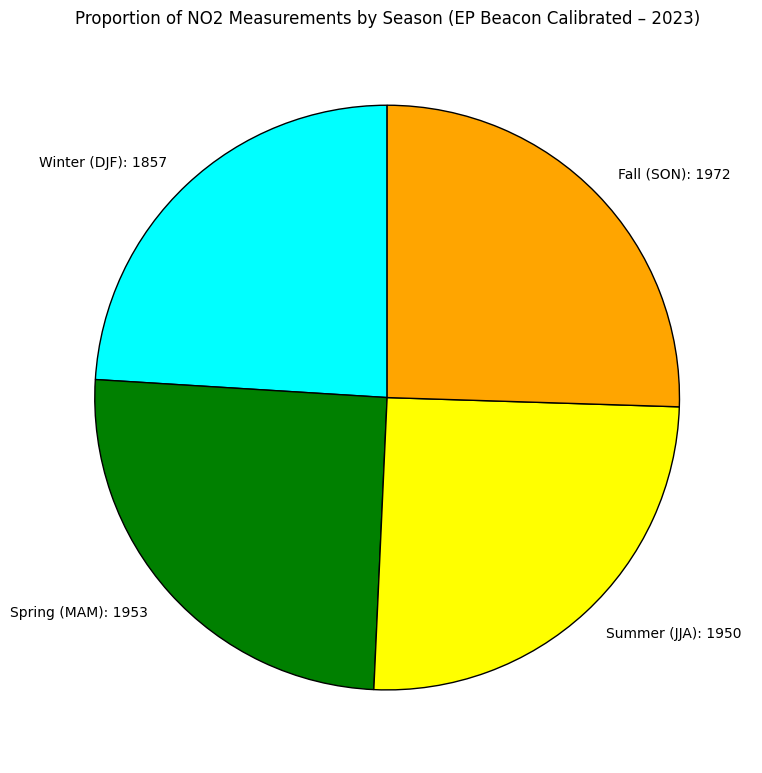

In [15]:
winter_count = len(winter["250_no2"].dropna())
spring_count = len(spring["250_no2"].dropna())
summer_count = len(summer["250_no2"].dropna())
fall_count = len(fall["250_no2"].dropna())

winter_string = "Winter (DJF): " + str(winter_count)
spring_string = "Spring (MAM): " + str(spring_count)
summer_string = "Summer (JJA): " + str(summer_count)
fall_spring = "Fall (SON): " + str(fall_count)

labels = [winter_string, spring_string, summer_string, fall_spring]
counts = [winter_count, spring_count, summer_count, fall_count]
colors = ["cyan", "green", "yellow", "orange"]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, startangle=90, colors=colors, wedgeprops={"edgecolor": "black"})
plt.title("Proportion of NO2 Measurements by Season (EP Beacon Calibrated – 2023)")
plt.tight_layout()
plt.show()


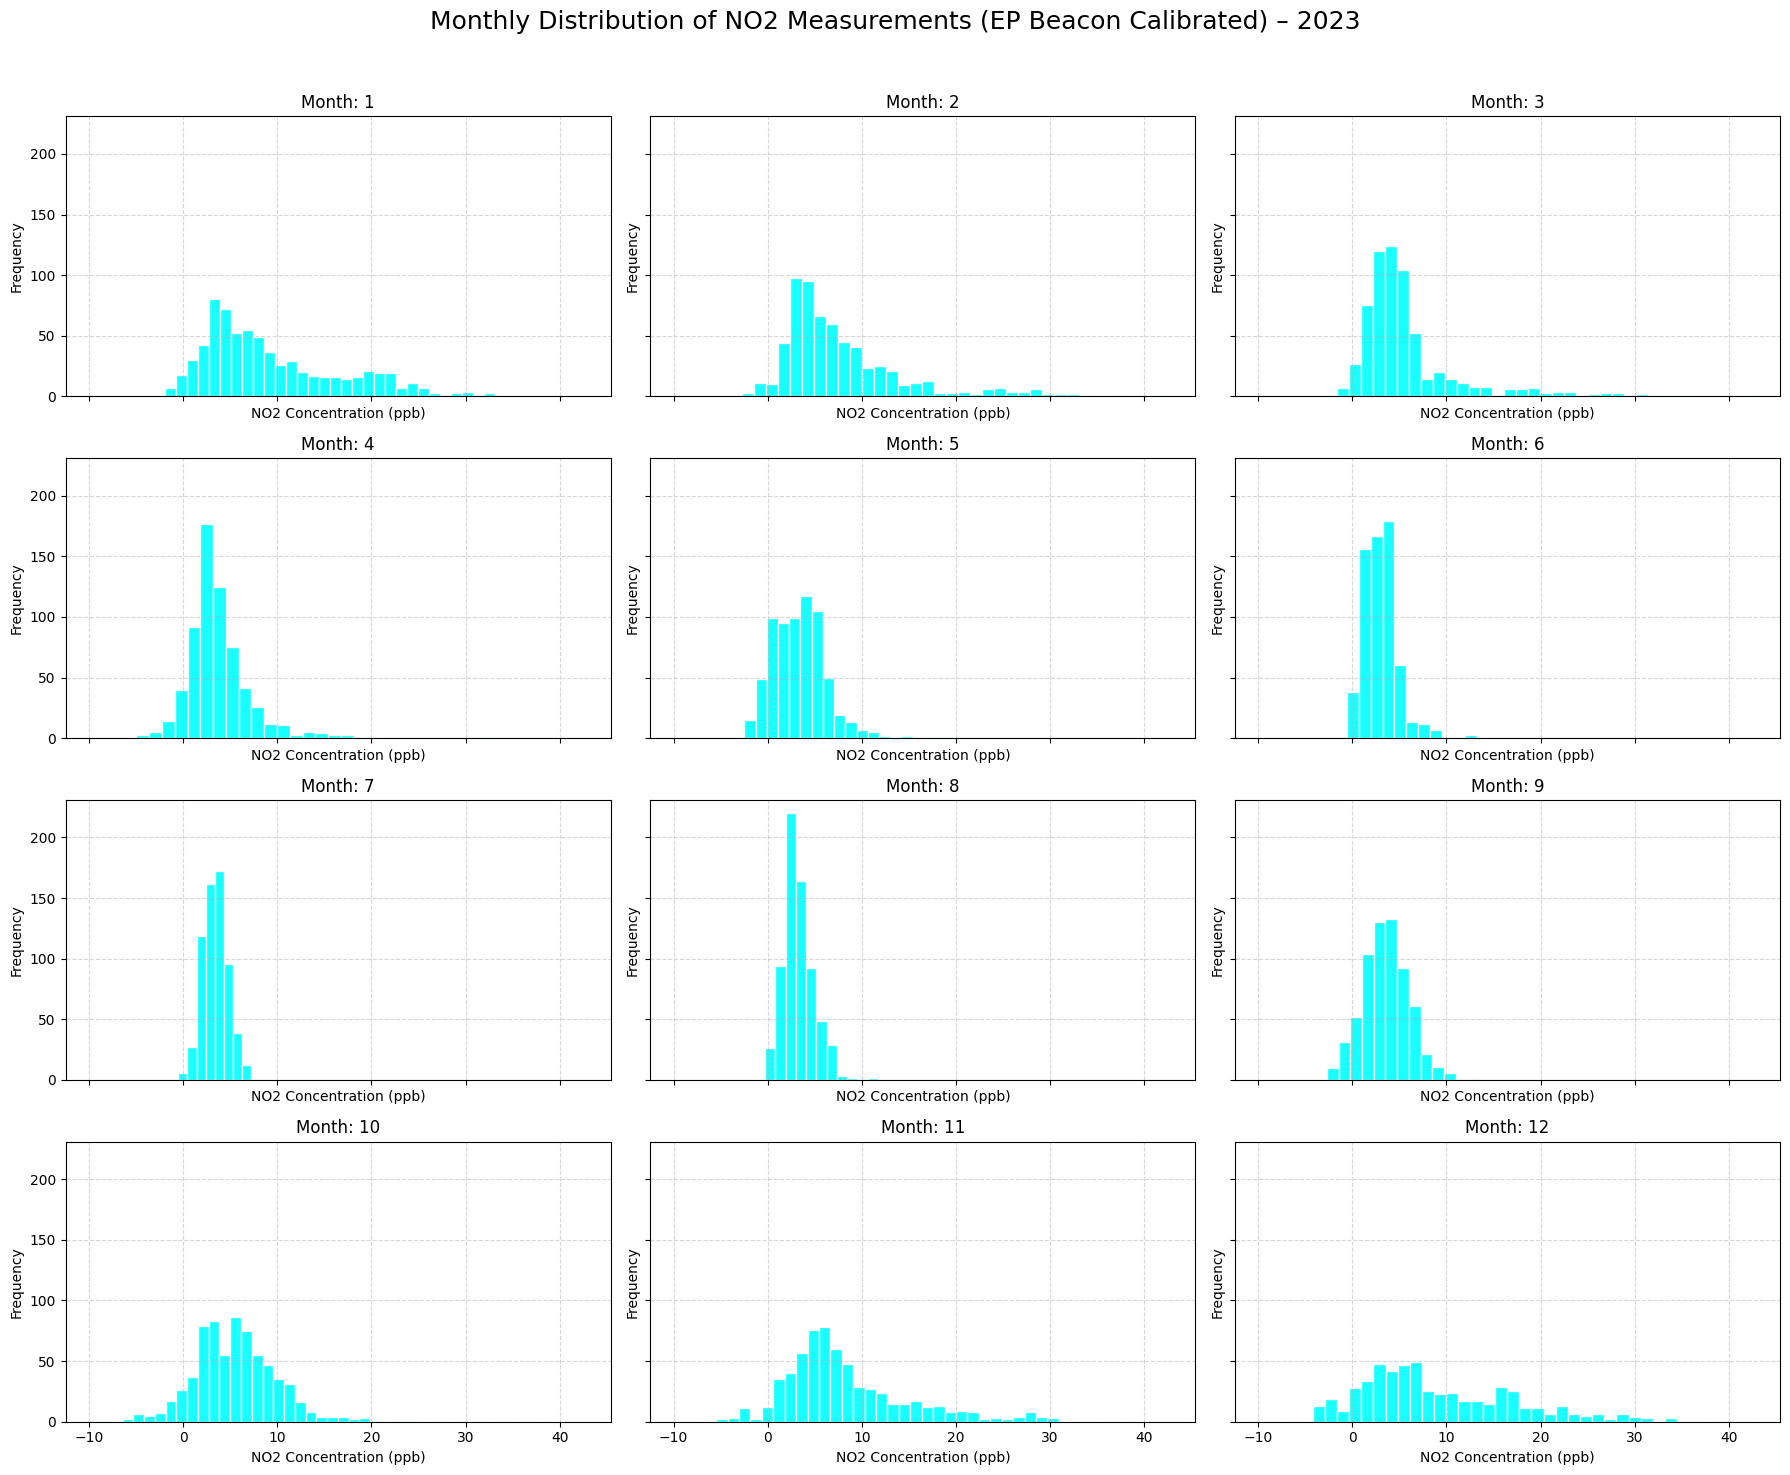

In [16]:
months = range(1, 13)
monthly_data = {month: calibrated_no2_EP[calibrated_no2_EP["month"] == month]["250_no2"].dropna() for month in months}

fig, axes = plt.subplots(4, 3, figsize=(18, 15), sharex=True, sharey=True)
axes = axes.flatten()

default_bins = 30
custom_bins = {
    2: 35,
    3: 35,
    5: 19,
    6: 11,
    7: 8,
    8: 11,
    9: 13,
}

for i, month in enumerate(months):
    data = monthly_data[month]
    bins = custom_bins.get(month, default_bins)
    axes[i].hist(data, bins=bins, color="cyan", edgecolor="white", alpha=0.9)
    axes[i].set_title(f"Month: {month}")
    axes[i].set_xlabel("NO2 Concentration (ppb)")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Monthly Distribution of NO2 Measurements (EP Beacon Calibrated) – 2023", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_14901/411143776.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(monthly_values, patch_artist=True, labels=month_labels,


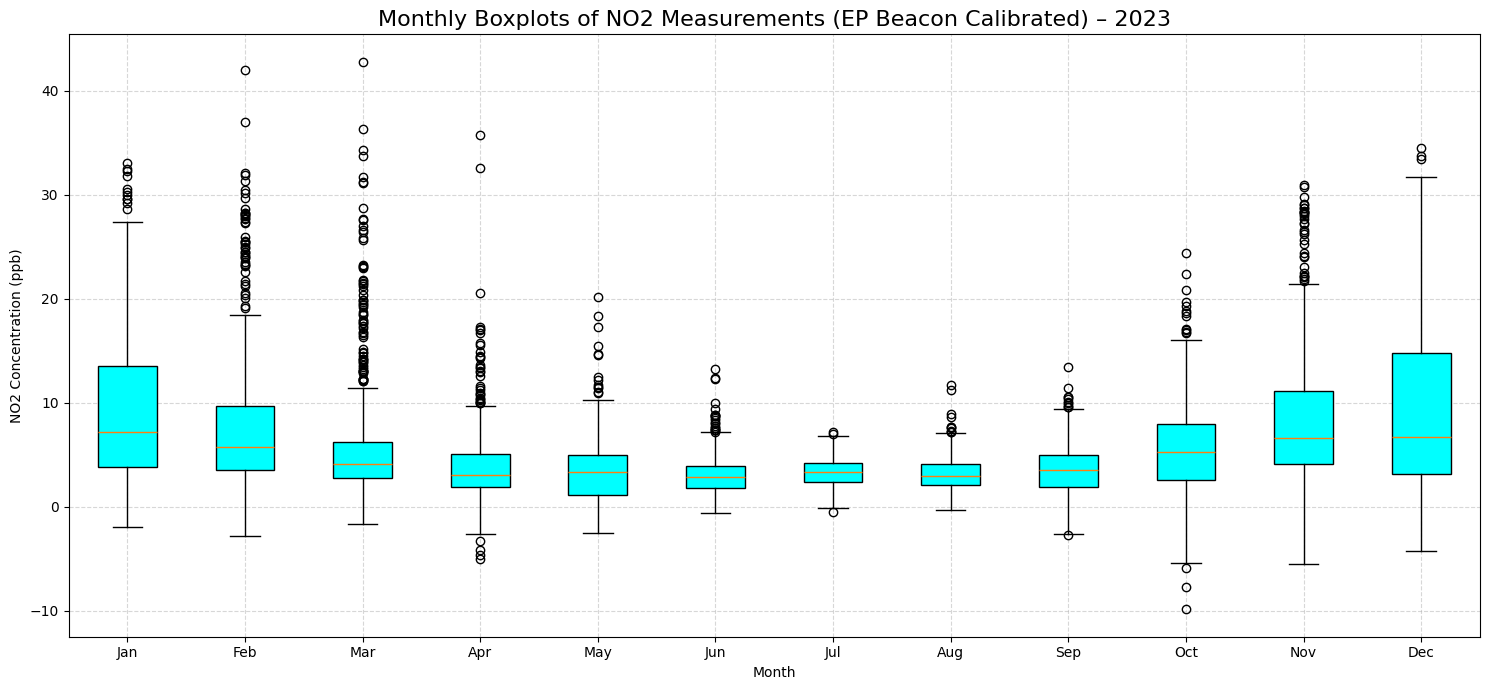

In [17]:
monthly_values = [monthly_data[m] for m in months]
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(15, 7))
plt.boxplot(monthly_values, patch_artist=True, labels=month_labels,
            boxprops=dict(facecolor="cyan", color="black"))

plt.title("Monthly Boxplots of NO2 Measurements (EP Beacon Calibrated) – 2023", fontsize=16)
plt.xlabel("Month")
plt.ylabel("NO2 Concentration (ppb)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

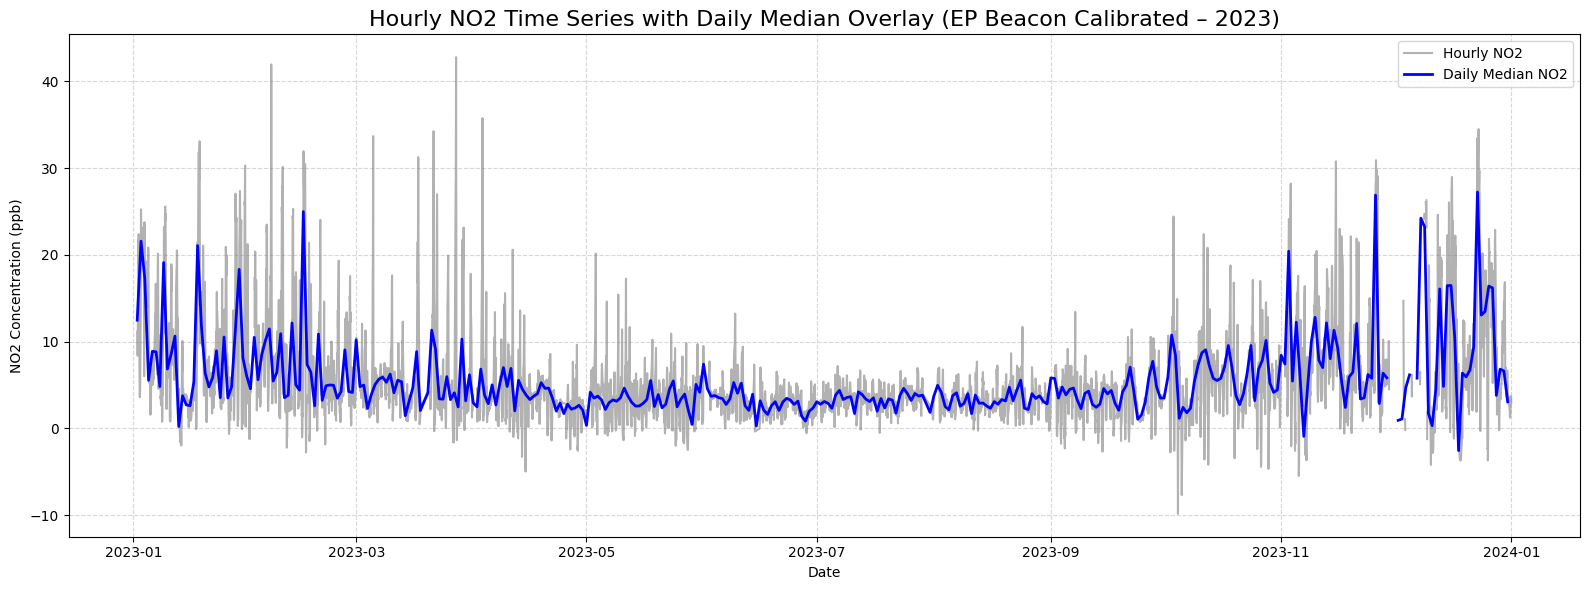

In [18]:
calibrated_no2_EP["datetime_utc"] = pd.to_datetime(calibrated_no2_EP["datetime_utc"])

calibrated_no2_EP["date"] = calibrated_no2_EP["datetime_utc"].dt.date

daily_median = calibrated_no2_EP.groupby("date")["250_no2"].median()

plt.figure(figsize=(16, 6))
plt.plot(calibrated_no2_EP["datetime_utc"], calibrated_no2_EP["250_no2"],
         color="gray", alpha=0.6, label="Hourly NO2")

plt.plot(daily_median.index, daily_median.values,
         color="blue", linewidth=2, label="Daily Median NO2")

plt.title("Hourly NO2 Time Series with Daily Median Overlay (EP Beacon Calibrated – 2023)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("NO2 Concentration (ppb)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



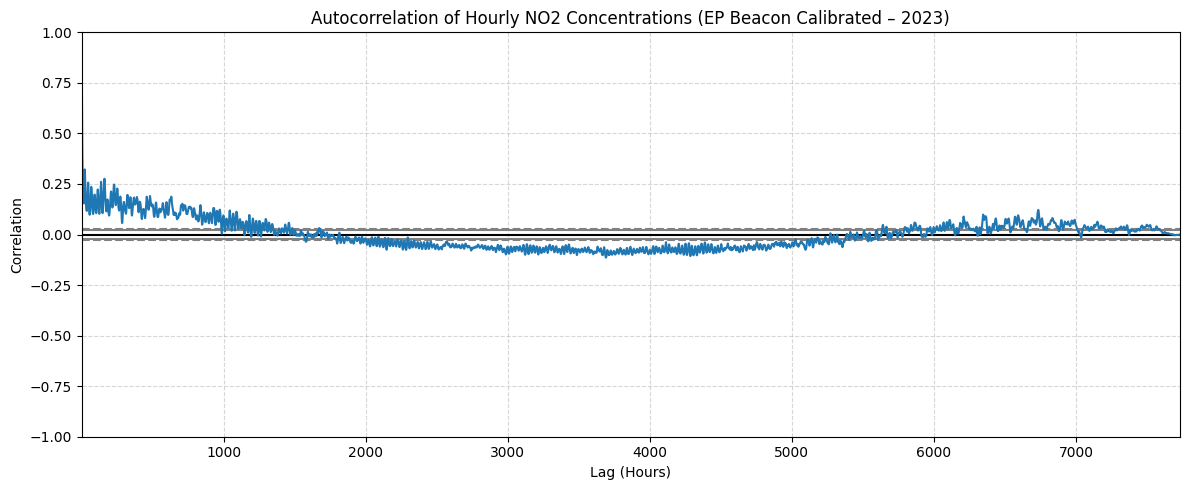

In [19]:
from pandas.plotting import autocorrelation_plot

no2_series = calibrated_no2_EP["250_no2"].dropna()

plt.figure(figsize=(12, 5))
autocorrelation_plot(no2_series)
plt.title("Autocorrelation of Hourly NO2 Concentrations (EP Beacon Calibrated – 2023)")
plt.xlabel("Lag (Hours)")
plt.ylabel("Correlation")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


<Figure size 1200x500 with 0 Axes>

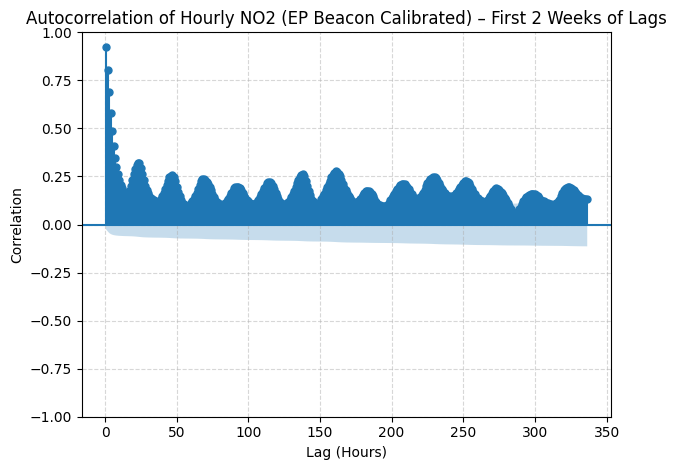

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

no2_series = calibrated_no2_EP["250_no2"].dropna()

plt.figure(figsize=(12, 5))
plot_acf(no2_series, lags=336, zero=False)
plt.title("Autocorrelation of Hourly NO2 (EP Beacon Calibrated) – First 2 Weeks of Lags")
plt.xlabel("Lag (Hours)")
plt.ylabel("Correlation")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


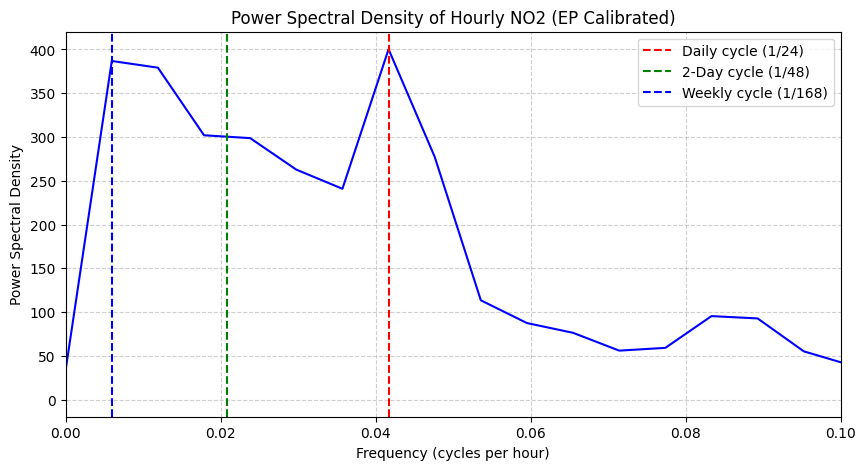

In [21]:
from scipy.signal import welch

no2_series = calibrated_no2_EP["250_no2"].dropna()

#one sample per hour
fs = 1  

frequencies, power = welch(no2_series, fs=fs, nperseg=168)

plt.figure(figsize=(10, 5))
plt.plot(frequencies, power, color="blue")
plt.xlabel("Frequency (cycles per hour)")
plt.ylabel("Power Spectral Density")
plt.title("Power Spectral Density of Hourly NO2 (EP Calibrated)")
plt.xlim(0, 0.1)
plt.grid(True, linestyle="--", alpha=0.6)

plt.axvline(1/24, color="red", linestyle="--", label="Daily cycle (1/24)")
plt.axvline(1/48, color="green", linestyle="--", label="2-Day cycle (1/48)")
plt.axvline(1/168, color="blue", linestyle="--", label="Weekly cycle (1/168)")
plt.legend()

plt.show()


In [60]:
calibrated_no2_EP.head()

,local_timestamp,250_no2,datetime_utc,missing,month,date
0,2023-01-01 05:00:00+00:00,NaN,2023-01-01 05:00:00+00:00,True,1,2023-01-01
1,2023-01-01 06:00:00+00:00,NaN,2023-01-01 06:00:00+00:00,True,1,2023-01-01
2,2023-01-01 07:00:00+00:00,NaN,2023-01-01 07:00:00+00:00,True,1,2023-01-01
3,2023-01-01 08:00:00+00:00,NaN,2023-01-01 08:00:00+00:00,True,1,2023-01-01
4,2023-01-01 09:00:00+00:00,NaN,2023-01-01 09:00:00+00:00,True,1,2023-01-01


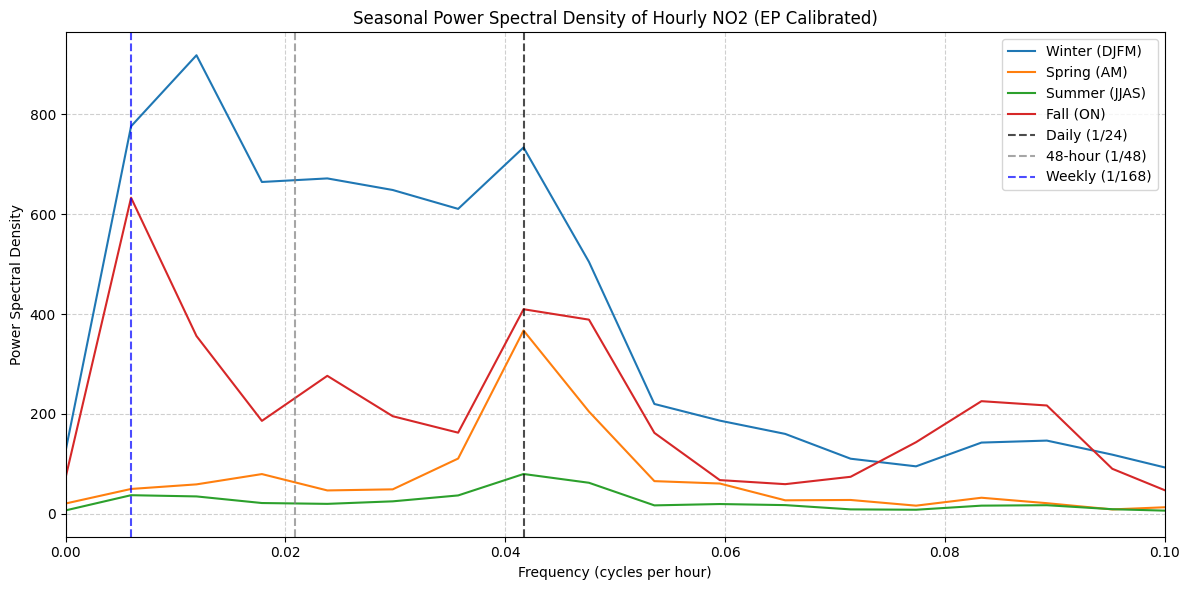

In [61]:
calibrated_no2_EP["datetime_utc"] = pd.to_datetime(calibrated_no2_EP["datetime_utc"])

seasons = {
    "Winter (DJFM)": [12, 1, 2, 3],
    "Spring (AM)": [4, 5],
    "Summer (JJAS)": [6, 7, 8, 9],
    "Fall (ON)": [10, 11]
}

fs = 1

plt.figure(figsize=(12, 6))

for i, (season_name, months) in enumerate(seasons.items(), 1):
    seasonal_data = calibrated_no2_EP[calibrated_no2_EP["month"].isin(months)]

    no2_series = seasonal_data["250_no2"].dropna()

    frequencies, power = welch(no2_series, fs=fs, nperseg=168)

    plt.plot(frequencies, power, label=season_name)

plt.xlabel("Frequency (cycles per hour)")
plt.ylabel("Power Spectral Density")
plt.title("Seasonal Power Spectral Density of Hourly NO2 (EP Calibrated)")
plt.xlim(0, 0.1)
plt.grid(True, linestyle="--", alpha=0.6)

plt.axvline(1/24, color="black", linestyle="--", alpha=0.7, label="Daily (1/24)")
plt.axvline(1/48, color="gray", linestyle="--", alpha=0.7, label="48-hour (1/48)")
plt.axvline(1/168, color="blue", linestyle="--", alpha=0.7, label="Weekly (1/168)")

plt.legend()
plt.tight_layout()
plt.show()


## Moving on to processing the EP DEM site

In [22]:
reference_no2_ep.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'date_local',
       'time_local', 'date_gmt', 'time_gmt', 'sample_measurement',
       'units_of_measure', 'units_of_measure_code', 'sample_duration',
       'sample_duration_code', 'sample_frequency', 'detection_limit',
       'uncertainty', 'qualifier', 'method_type', 'method', 'method_code',
       'state', 'county', 'date_of_last_change', 'cbsa_code'],
      dtype='object')

In [23]:
columns_to_remove = ["state_code", "county_code", "site_number", "parameter_code", "poc", "datum", "date_local", "time_local", "units_of_measure_code", 'sample_duration_code', 'sample_frequency', 'uncertainty', 'qualifier', 'method_type', 'method', 'method_code', 'date_of_last_change', 'cbsa_code']
reference_no2_ep = reference_no2_ep.drop(columns=columns_to_remove)
reference_no2_ep.head()

,latitude,longitude,parameter,date_gmt,time_gmt,sample_measurement,units_of_measure,sample_duration,detection_limit,state,county
0,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-04-19,13:00,NaN,Parts per billion,1 HOUR,0.05,Rhode Island,Providence
1,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-04-19,14:00,NaN,Parts per billion,1 HOUR,0.05,Rhode Island,Providence
2,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-04-19,15:00,NaN,Parts per billion,1 HOUR,0.05,Rhode Island,Providence
3,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-04-19,16:00,NaN,Parts per billion,1 HOUR,0.05,Rhode Island,Providence
4,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-04-19,17:00,NaN,Parts per billion,1 HOUR,0.05,Rhode Island,Providence


In [24]:
reference_no2_ep["datetime_utc"] = pd.to_datetime(reference_no2_ep["date_gmt"] + " " + reference_no2_ep["time_gmt"], utc=True)

reference_no2_ep.rename(columns={"sample_measurement": "true_no2"}, inplace=True)

reference_no2_ep.sort_values("datetime_utc", inplace=True)
reference_no2_ep.reset_index(drop=True, inplace=True)


In [25]:
reference_no2_ep["true_no2"].describe()

count    16368.000000
mean         5.558572
std          5.906841
min          0.100000
25%          1.800000
50%          3.300000
75%          6.800000
max         38.800000
Name: true_no2, dtype: float64

In [26]:
num_null = int(reference_no2_ep["true_no2"].isnull().sum())
print("Number of null values: " + str(num_null))
print("Percentage of null values: " + str(num_null / len(reference_no2_ep["true_no2"]) * 100) + str("%"))

Number of null values: 1152
Percentage of null values: 6.575342465753424%


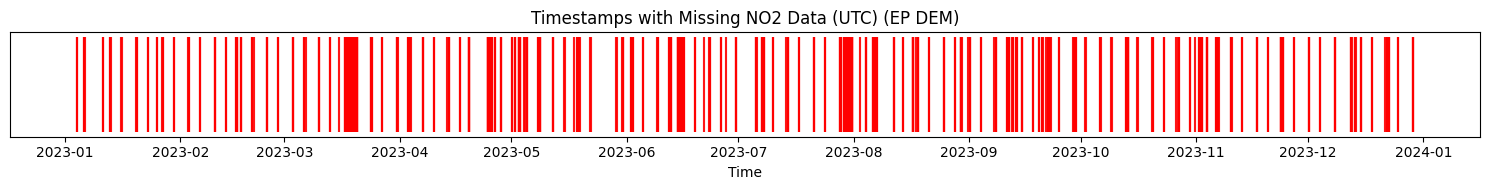

In [27]:
#understand missing data better
reference_no2_ep["missing"] = reference_no2_ep["true_no2"].isna()

missing_times = reference_no2_ep.loc[reference_no2_ep["missing"], "datetime_utc"]

plt.figure(figsize=(15, 2))
plt.vlines(missing_times, ymin=0, ymax=1, color="red", alpha=0.7)
plt.title("Timestamps with Missing NO2 Data (UTC) (EP DEM)")
plt.yticks([])
plt.xlabel("Time")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

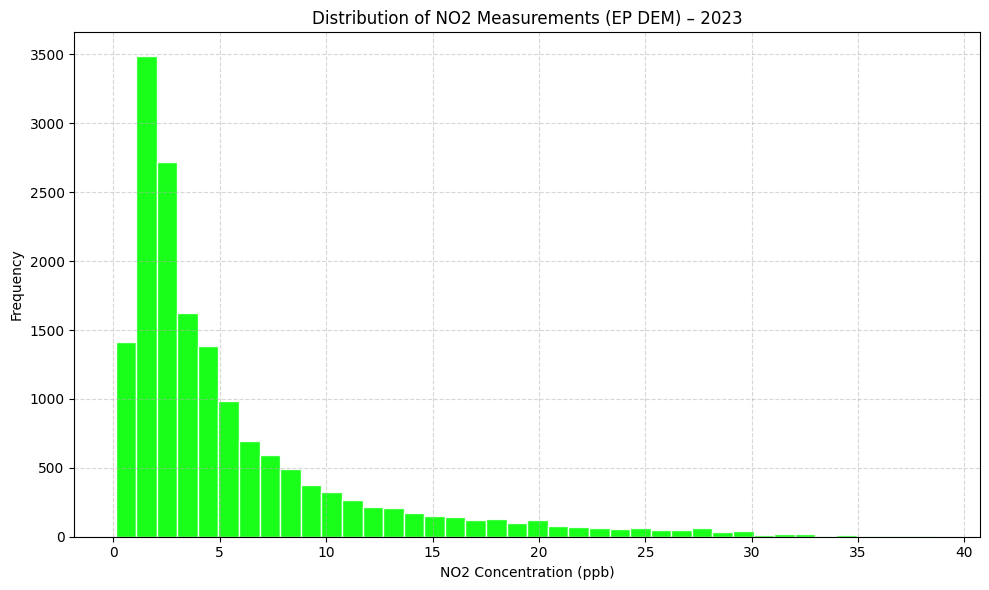

In [28]:
no2_values = reference_no2_ep["true_no2"].dropna()

plt.figure(figsize=(10, 6))
plt.hist(no2_values, bins=40, color="lime", edgecolor="white", alpha=0.9)

plt.title("Distribution of NO2 Measurements (EP DEM) – 2023")
plt.xlabel("NO2 Concentration (ppb)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

plt.show()

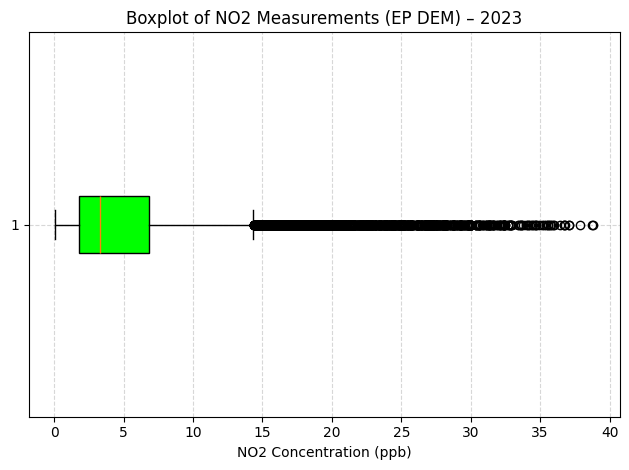

In [29]:
plt.boxplot(no2_values, vert=False, patch_artist=True,
            boxprops=dict(facecolor="lime", color="black"))

plt.title("Boxplot of NO2 Measurements (EP DEM) – 2023")
plt.xlabel("NO2 Concentration (ppb)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

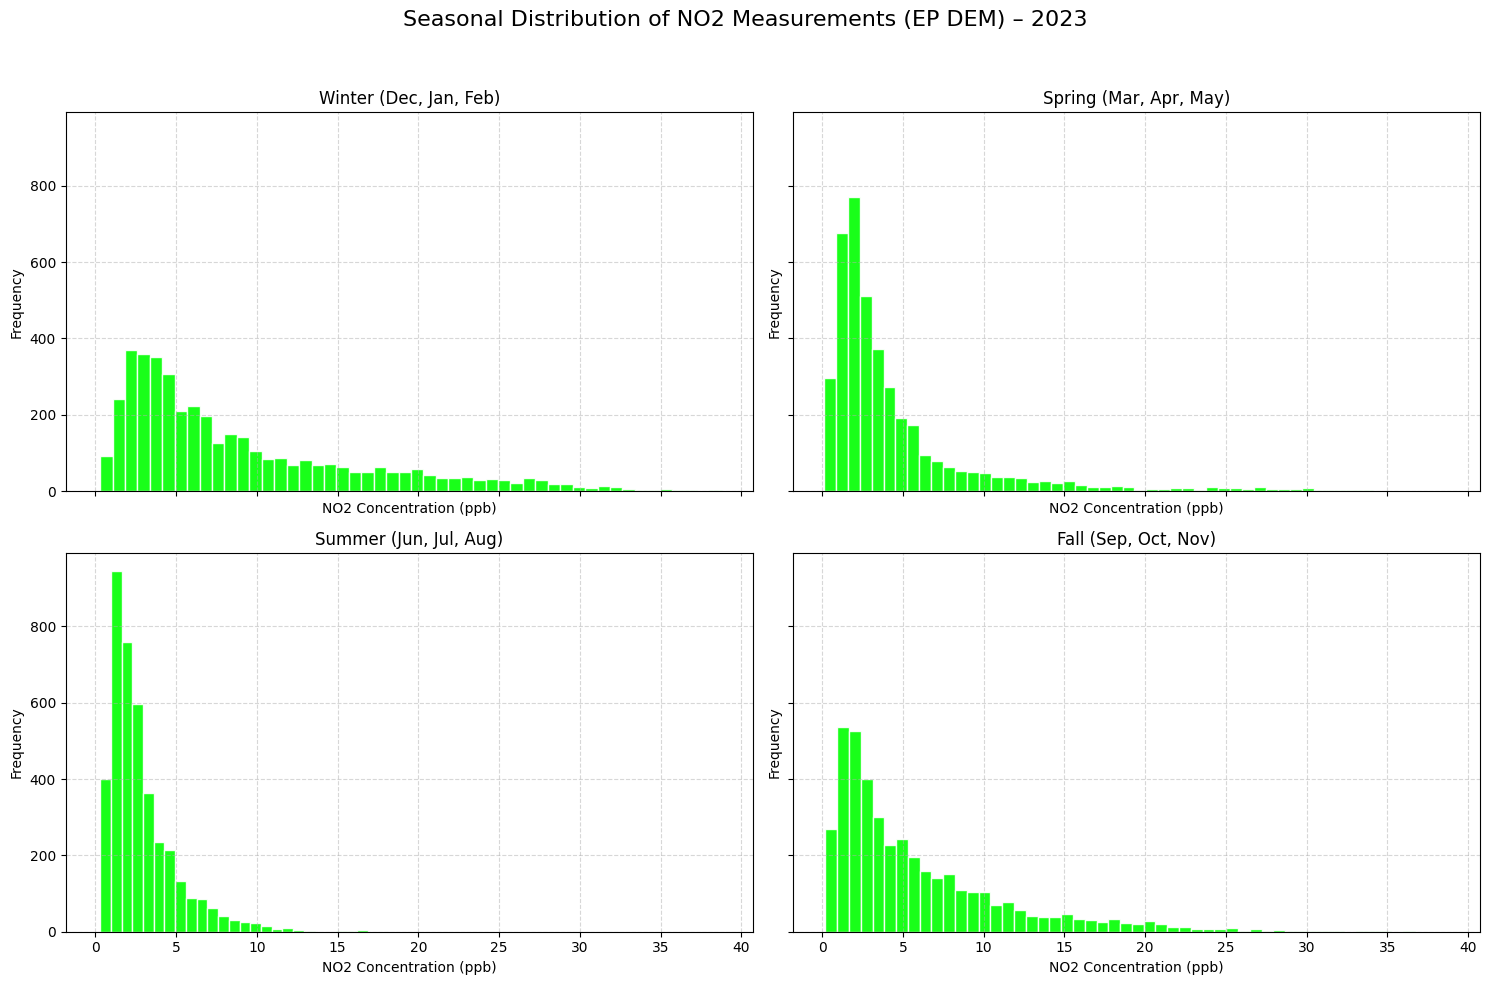

In [30]:
reference_no2_ep["month"] = reference_no2_ep["datetime_utc"].dt.month

winter = reference_no2_ep[reference_no2_ep["month"].isin([1, 2, 12])]
spring = reference_no2_ep[reference_no2_ep["month"].isin([3, 4, 5])]
summer = reference_no2_ep[reference_no2_ep["month"].isin([6, 7, 8])]
fall = reference_no2_ep[reference_no2_ep["month"].isin([9, 10, 11])]

winter_vals = winter["true_no2"].dropna()
spring_vals = spring["true_no2"].dropna()
summer_vals = summer["true_no2"].dropna()
fall_vals = fall["true_no2"].dropna()

fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

seasons = {
    "Winter (Dec, Jan, Feb)": winter_vals,
    "Spring (Mar, Apr, May)": spring_vals,
    "Summer (Jun, Jul, Aug)": summer_vals,
    "Fall (Sep, Oct, Nov)": fall_vals
}

axes = axes.flatten()

for i, (season, data) in enumerate(seasons.items()):
    bins = 50
    if "Summer" in season:
        bins = 25
    
    axes[i].hist(data, bins=bins, color="lime", edgecolor="white", alpha=0.9)
    axes[i].set_title(season)
    axes[i].set_xlabel("NO2 Concentration (ppb)")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Seasonal Distribution of NO2 Measurements (EP DEM) – 2023", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_14901/1952694920.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(seasonal_data, vert=False, patch_artist=True,


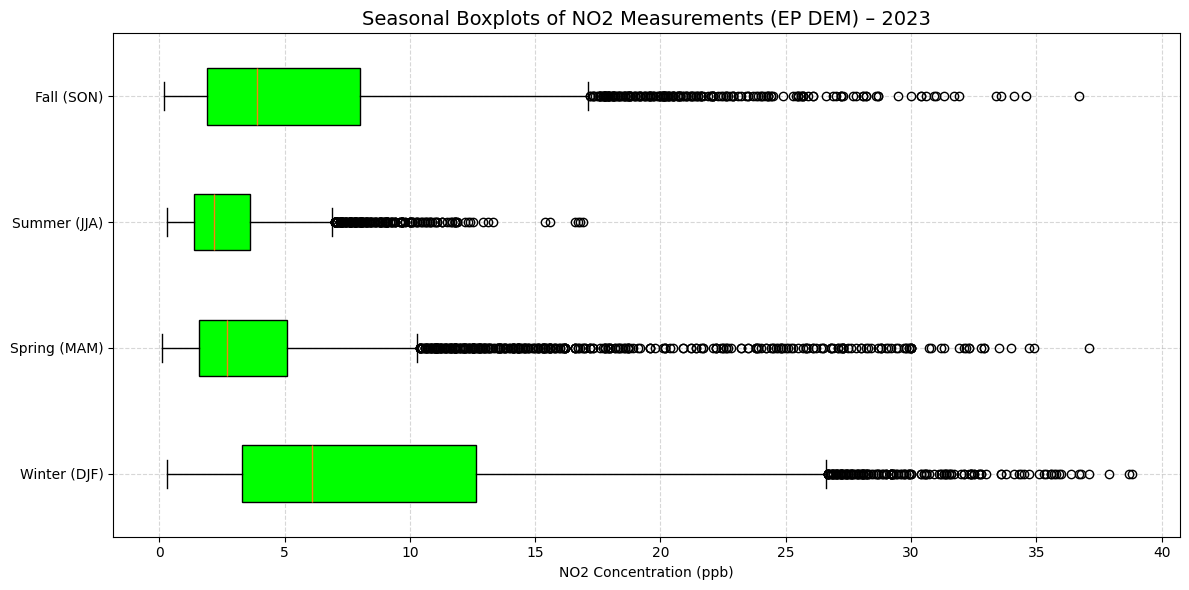

In [31]:
seasonal_data = [winter_vals, spring_vals, summer_vals, fall_vals]
season_labels = ["Winter (DJF)", "Spring (MAM)", "Summer (JJA)", "Fall (SON)"]


plt.figure(figsize=(12, 6))
plt.boxplot(seasonal_data, vert=False, patch_artist=True,
            labels=season_labels,
            boxprops=dict(facecolor="lime", color="black"))

plt.title("Seasonal Boxplots of NO2 Measurements (EP DEM) – 2023", fontsize=14)
plt.xlabel("NO2 Concentration (ppb)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


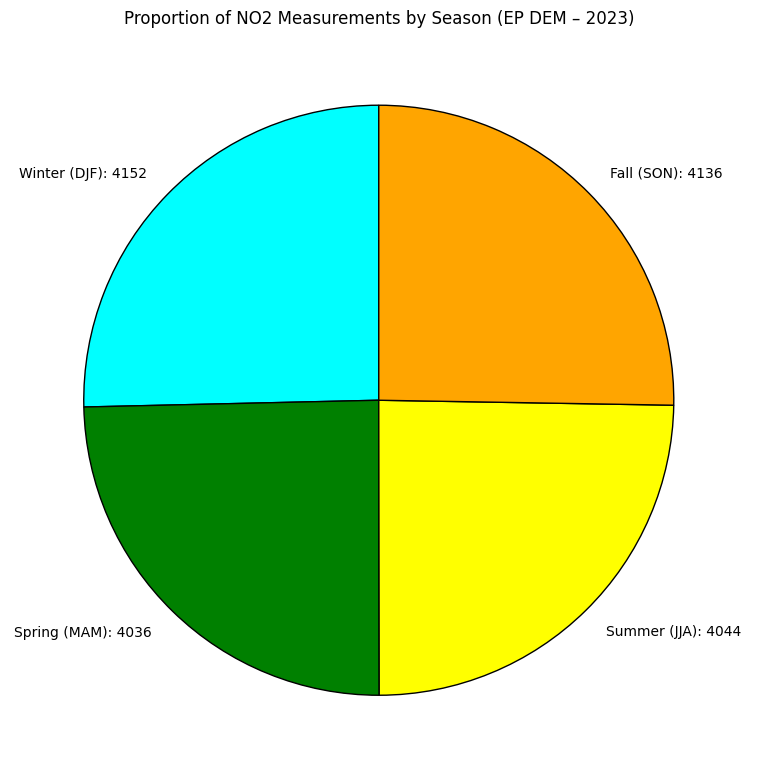

In [32]:
winter_count = len(winter["true_no2"].dropna())
spring_count = len(spring["true_no2"].dropna())
summer_count = len(summer["true_no2"].dropna())
fall_count = len(fall["true_no2"].dropna())

winter_string = "Winter (DJF): " + str(winter_count)
spring_string = "Spring (MAM): " + str(spring_count)
summer_string = "Summer (JJA): " + str(summer_count)
fall_spring = "Fall (SON): " + str(fall_count)

labels = [winter_string, spring_string, summer_string, fall_spring]
counts = [winter_count, spring_count, summer_count, fall_count]
colors = ["cyan", "green", "yellow", "orange"]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, startangle=90, colors=colors, wedgeprops={"edgecolor": "black"})
plt.title("Proportion of NO2 Measurements by Season (EP DEM – 2023)")
plt.tight_layout()
plt.show()

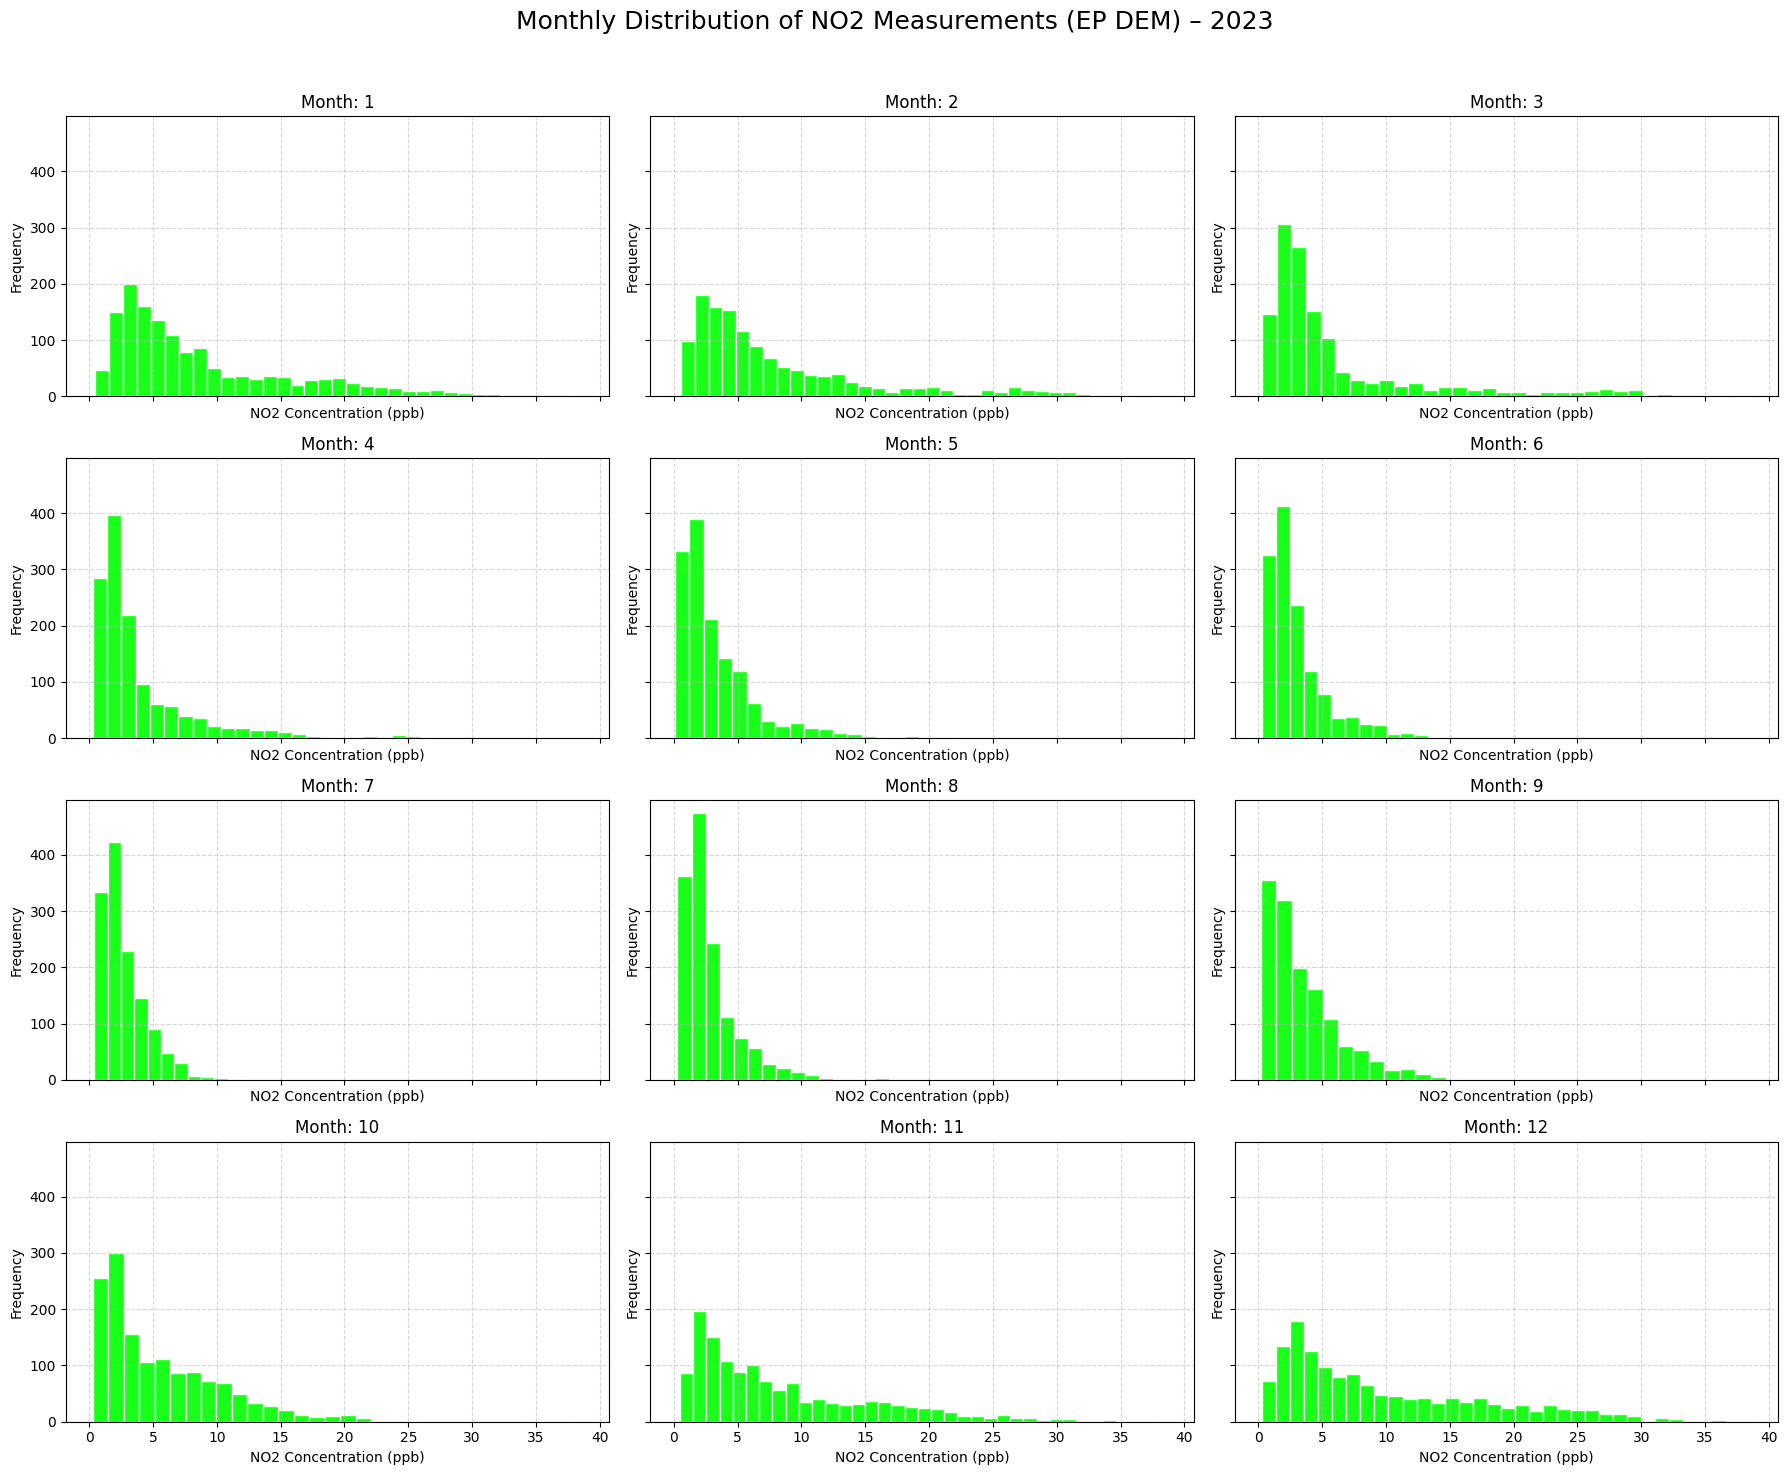

In [33]:
months = range(1, 13)
monthly_data = {month: reference_no2_ep[reference_no2_ep["month"] == month]["true_no2"].dropna() for month in months}

fig, axes = plt.subplots(4, 3, figsize=(18, 15), sharex=True, sharey=True)
axes = axes.flatten()

default_bins = 35
custom_bins = {
    3: 30,
    4: 33,
    5: 20,
    6: 12,
    7: 11,
    8: 15,
    9: 12,
    10: 20
}

for i, month in enumerate(months):
    data = monthly_data[month]
    bins = custom_bins.get(month, default_bins)
    axes[i].hist(data, bins=bins, color="lime", edgecolor="white", alpha=0.9)
    axes[i].set_title(f"Month: {month}")
    axes[i].set_xlabel("NO2 Concentration (ppb)")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Monthly Distribution of NO2 Measurements (EP DEM) – 2023", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_14901/883805939.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(monthly_values, patch_artist=True, labels=month_labels,


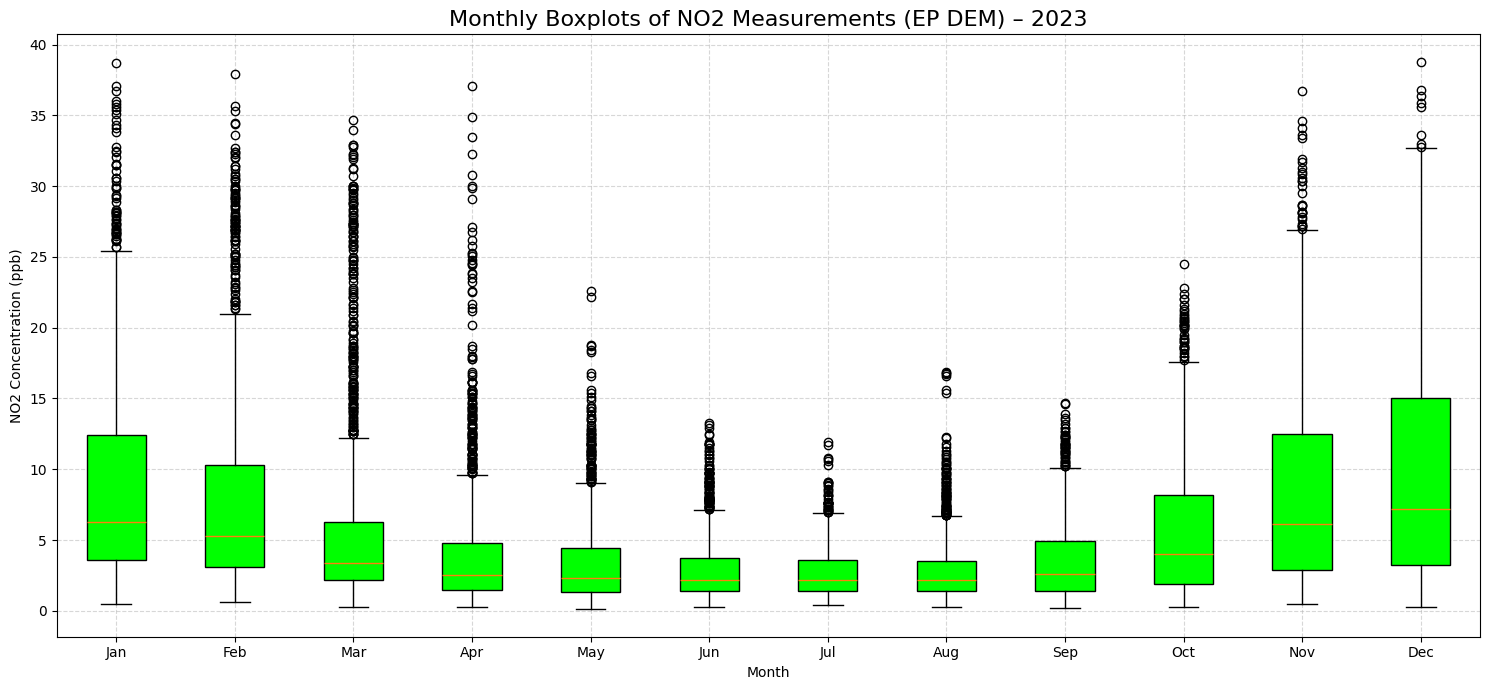

In [34]:
monthly_values = [monthly_data[m] for m in months]
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(15, 7))
plt.boxplot(monthly_values, patch_artist=True, labels=month_labels,
            boxprops=dict(facecolor="lime", color="black"))

plt.title("Monthly Boxplots of NO2 Measurements (EP DEM) – 2023", fontsize=16)
plt.xlabel("Month")
plt.ylabel("NO2 Concentration (ppb)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

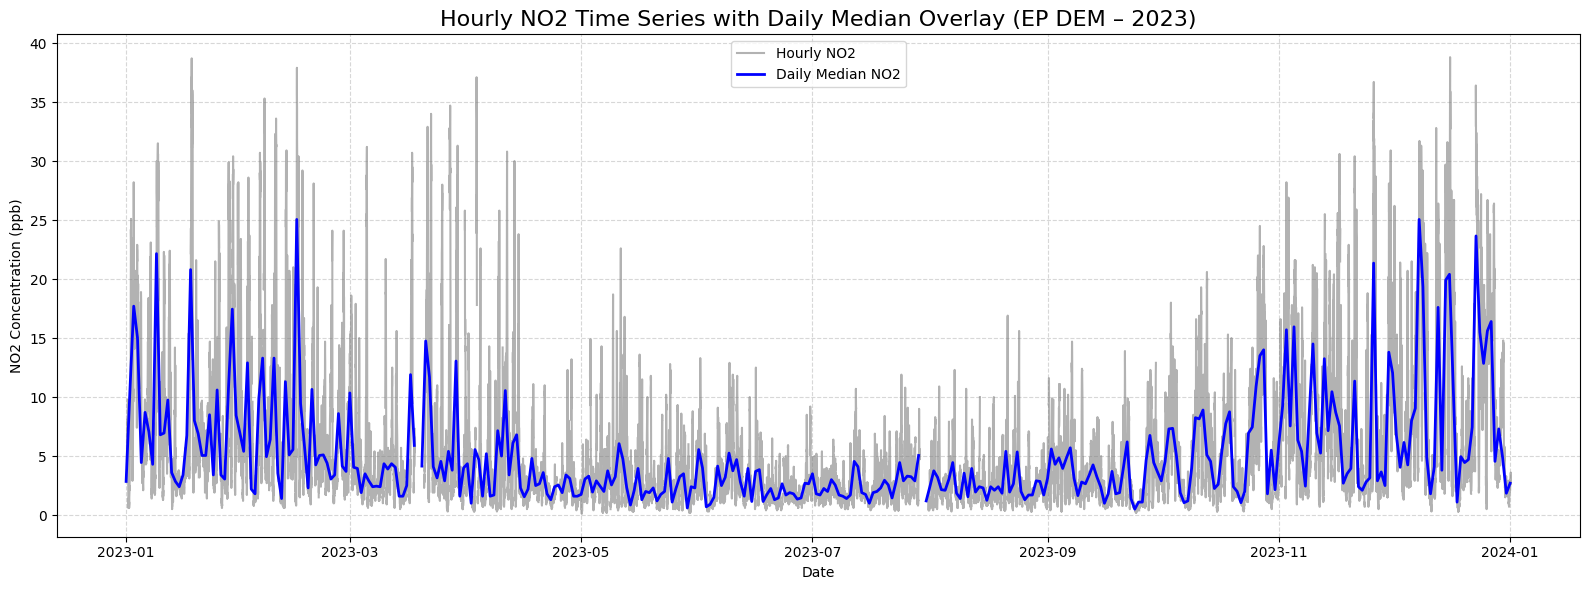

In [35]:
reference_no2_ep["datetime_utc"] = pd.to_datetime(reference_no2_ep["datetime_utc"])

reference_no2_ep["date"] = reference_no2_ep["datetime_utc"].dt.date

daily_median = reference_no2_ep.groupby("date")["true_no2"].median()

plt.figure(figsize=(16, 6))
plt.plot(reference_no2_ep["datetime_utc"], reference_no2_ep["true_no2"],
         color="gray", alpha=0.6, label="Hourly NO2")

plt.plot(daily_median.index, daily_median.values,
         color="blue", linewidth=2, label="Daily Median NO2")

plt.title("Hourly NO2 Time Series with Daily Median Overlay (EP DEM – 2023)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("NO2 Concentration (ppb)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


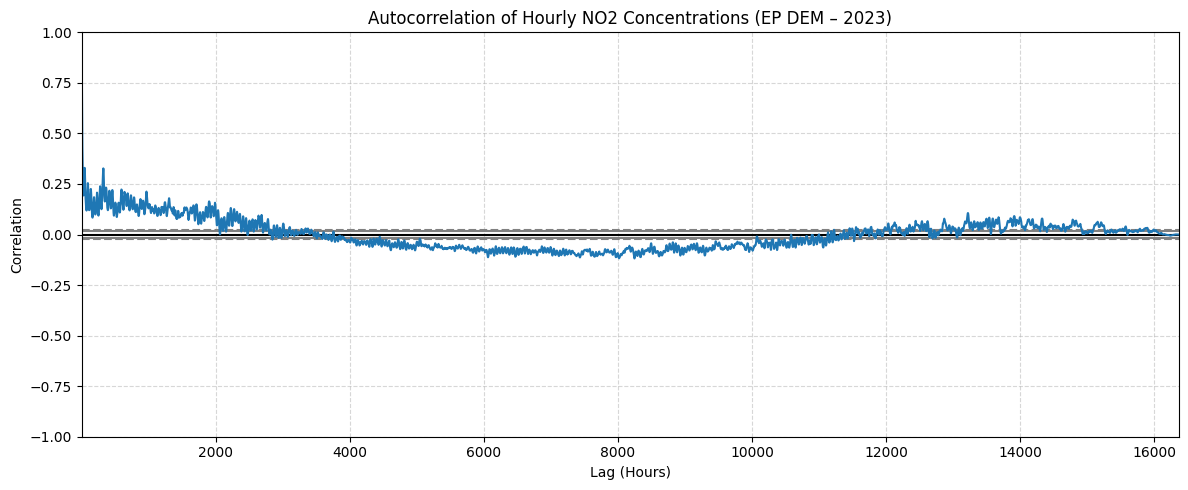

In [36]:
no2_series = reference_no2_ep["true_no2"].dropna()

plt.figure(figsize=(12, 5))
autocorrelation_plot(no2_series)
plt.title("Autocorrelation of Hourly NO2 Concentrations (EP DEM – 2023)")
plt.xlabel("Lag (Hours)")
plt.ylabel("Correlation")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


<Figure size 1200x500 with 0 Axes>

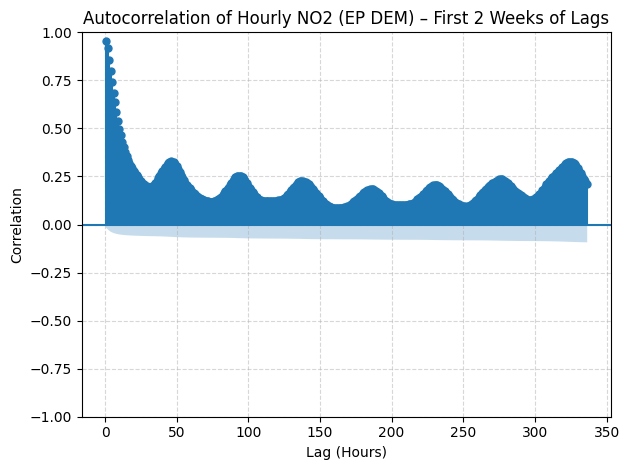

In [37]:
no2_series = reference_no2_ep["true_no2"].dropna()

plt.figure(figsize=(12, 5))
plot_acf(no2_series, lags=336, zero=False)
plt.title("Autocorrelation of Hourly NO2 (EP DEM) – First 2 Weeks of Lags")
plt.xlabel("Lag (Hours)")
plt.ylabel("Correlation")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

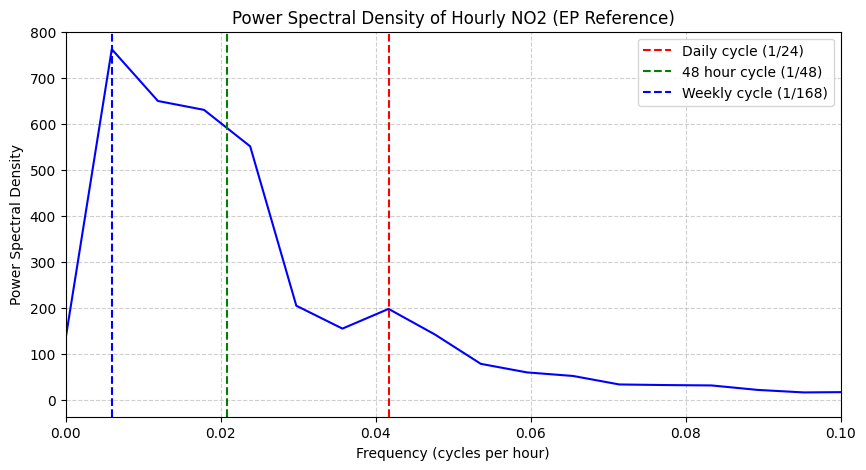

In [38]:
no2_series = reference_no2_ep["true_no2"].dropna()

#one sample per hour
fs = 1  

frequencies, power = welch(no2_series, fs=fs, nperseg=168)

plt.figure(figsize=(10, 5))
plt.plot(frequencies, power, color="blue")
plt.xlabel("Frequency (cycles per hour)")
plt.ylabel("Power Spectral Density")
plt.title("Power Spectral Density of Hourly NO2 (EP Reference)")
plt.xlim(0, 0.1)
plt.grid(True, linestyle="--", alpha=0.6)

plt.axvline(1/24, color="red", linestyle="--", label="Daily cycle (1/24)")
plt.axvline(1/48, color="green", linestyle="--", label="48 hour cycle (1/48)")
plt.axvline(1/168, color="blue", linestyle="--", label="Weekly cycle (1/168)")
plt.legend()

plt.show()


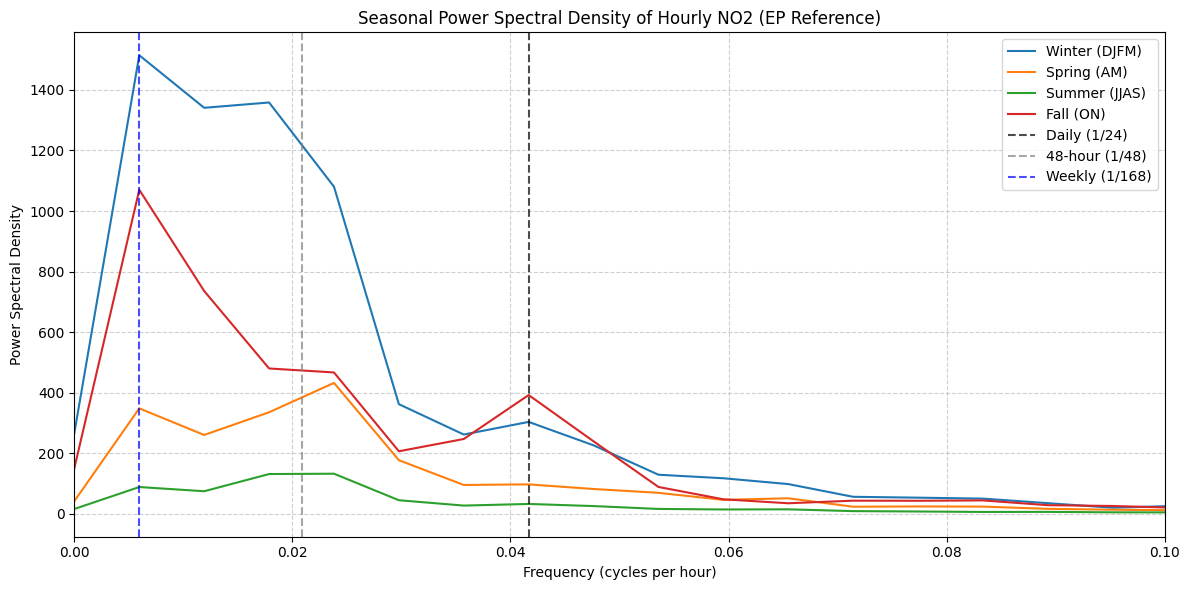

In [55]:
reference_no2_ep["datetime_utc"] = pd.to_datetime(reference_no2_ep["datetime_utc"])

seasons = {
    "Winter (DJFM)": [12, 1, 2, 3],
    "Spring (AM)": [4, 5],
    "Summer (JJAS)": [6, 7, 8, 9],
    "Fall (ON)": [10, 11]
}

fs = 1

plt.figure(figsize=(12, 6))

for i, (season_name, months) in enumerate(seasons.items(), 1):
    seasonal_data = reference_no2_ep[reference_no2_ep["month"].isin(months)]

    no2_series = seasonal_data["true_no2"].dropna()

    frequencies, power = welch(no2_series, fs=fs, nperseg=168)

    plt.plot(frequencies, power, label=season_name)

plt.xlabel("Frequency (cycles per hour)")
plt.ylabel("Power Spectral Density")
plt.title("Seasonal Power Spectral Density of Hourly NO2 (EP Reference)")
plt.xlim(0, 0.1)
plt.grid(True, linestyle="--", alpha=0.6)

plt.axvline(1/24, color="black", linestyle="--", alpha=0.7, label="Daily (1/24)")
plt.axvline(1/48, color="gray", linestyle="--", alpha=0.7, label="48-hour (1/48)")
plt.axvline(1/168, color="blue", linestyle="--", alpha=0.7, label="Weekly (1/168)")

plt.legend()
plt.tight_layout()
plt.show()


## Bring the graphs together

In [40]:
combined_df = pd.merge(
    calibrated_no2_EP[["datetime_utc", "250_no2"]],
    reference_no2_ep[["datetime_utc", "true_no2"]],
    on="datetime_utc",
    how="inner"
)
combined_df.sort_values("datetime_utc", inplace=True)

combined_df.head()

,datetime_utc,250_no2,true_no2
0,2023-01-01 05:00:00+00:00,NaN,4.1
1,2023-01-01 05:00:00+00:00,NaN,4.6
2,2023-01-01 06:00:00+00:00,NaN,5.9
3,2023-01-01 06:00:00+00:00,NaN,6.6
4,2023-01-01 07:00:00+00:00,NaN,7.4


<Figure size 1600x600 with 0 Axes>

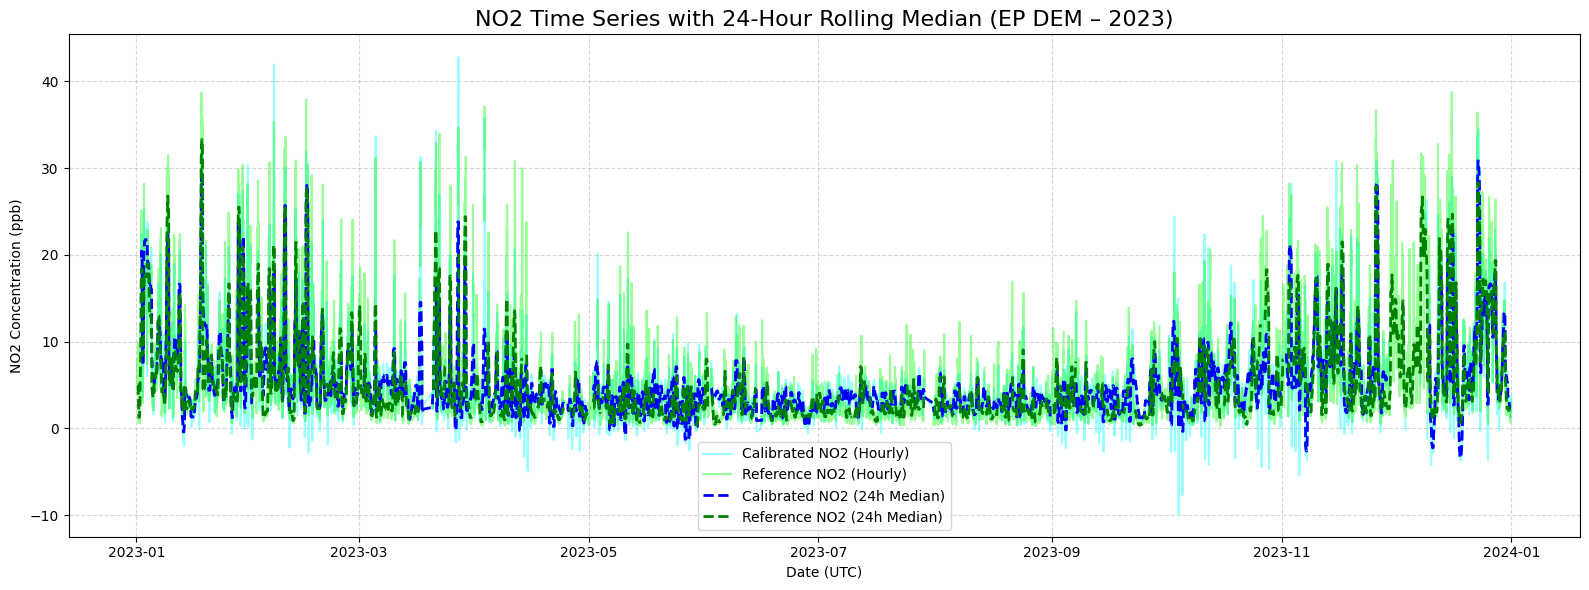

In [41]:
plt.figure(figsize=(16, 6))

combined_df["250_no2_median_24h"] = combined_df["250_no2"].rolling(window=24, center=True).median()
combined_df["true_no2_median_24h"] = combined_df["true_no2"].rolling(window=24, center=True).median()

plt.figure(figsize=(16, 6))

plt.plot(combined_df["datetime_utc"], combined_df["250_no2"], color="cyan", alpha=0.4, label="Calibrated NO2 (Hourly)")
plt.plot(combined_df["datetime_utc"], combined_df["true_no2"], color="lime", alpha=0.4, label="Reference NO2 (Hourly)")


plt.plot(combined_df["datetime_utc"], combined_df["250_no2_median_24h"],
         color="blue", linestyle="--", linewidth=2, label="Calibrated NO2 (24h Median)")
plt.plot(combined_df["datetime_utc"], combined_df["true_no2_median_24h"],
         color="green", linestyle="--", linewidth=2, label="Reference NO2 (24h Median)")

plt.title("NO2 Time Series with 24-Hour Rolling Median (EP DEM – 2023)", fontsize=16)
plt.xlabel("Date (UTC)")
plt.ylabel("NO2 Concentration (ppb)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



In [42]:
def plot_single_day(df, date_str):
    from datetime import datetime, timedelta

    date = pd.to_datetime(date_str, utc=True)
    next_day = date + timedelta(days=1)

    df_day = df[(df["datetime_utc"] >= date) & (df["datetime_utc"] < next_day)].copy()

    plt.figure(figsize=(12, 5))

    plt.plot(df_day["datetime_utc"], df_day["250_no2"], color="cyan", alpha=0.4, label="Calibrated NO₂")
    plt.plot(df_day["datetime_utc"], df_day["true_no2"], color="lime", alpha=0.4, label="Reference NO₂")


    plt.title(f"NO2 Time Series – {date_str} (UTC)", fontsize=14)
    plt.xlabel("Hour (UTC)")
    plt.ylabel("NO2 Concentration (ppb)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


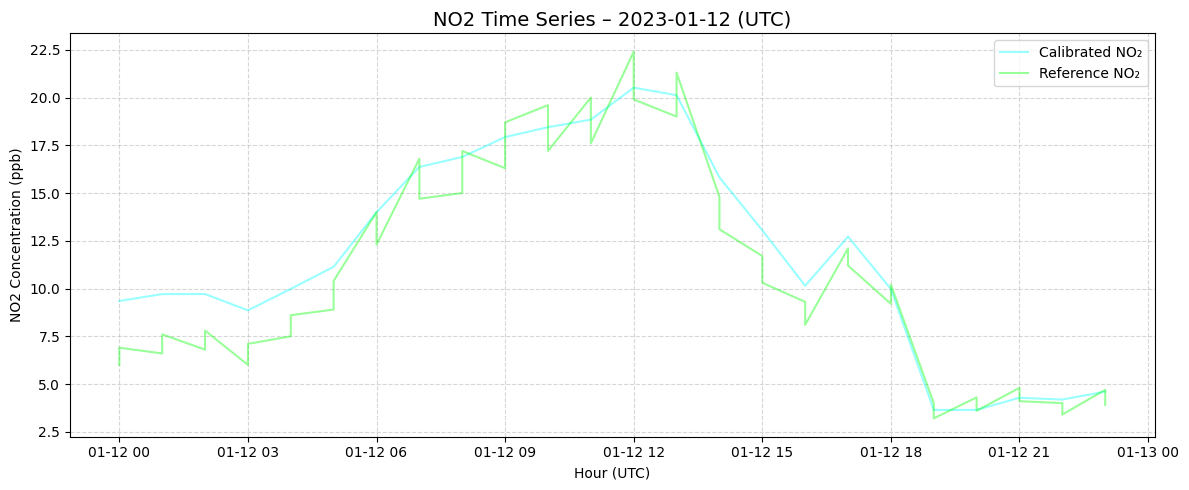

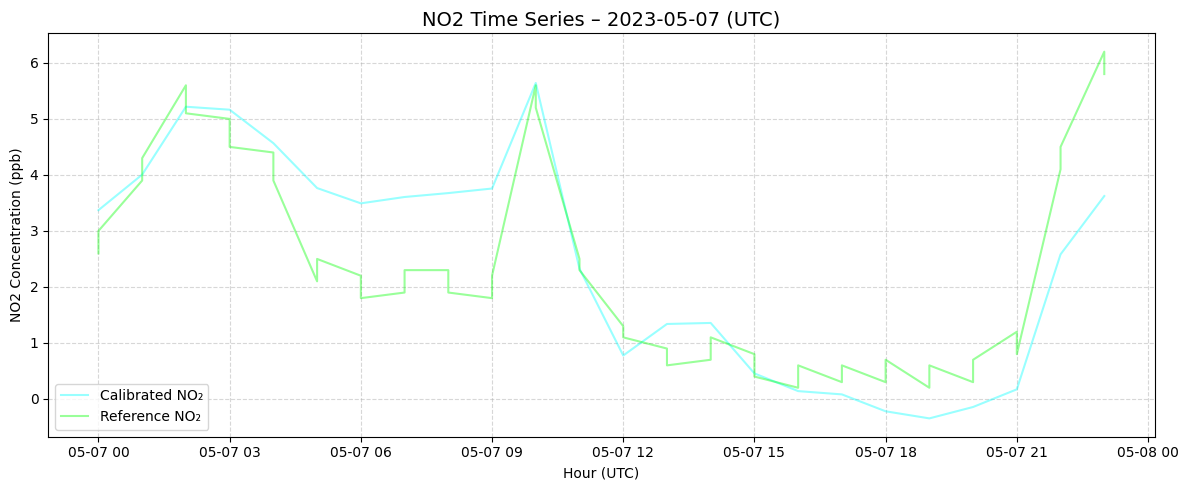

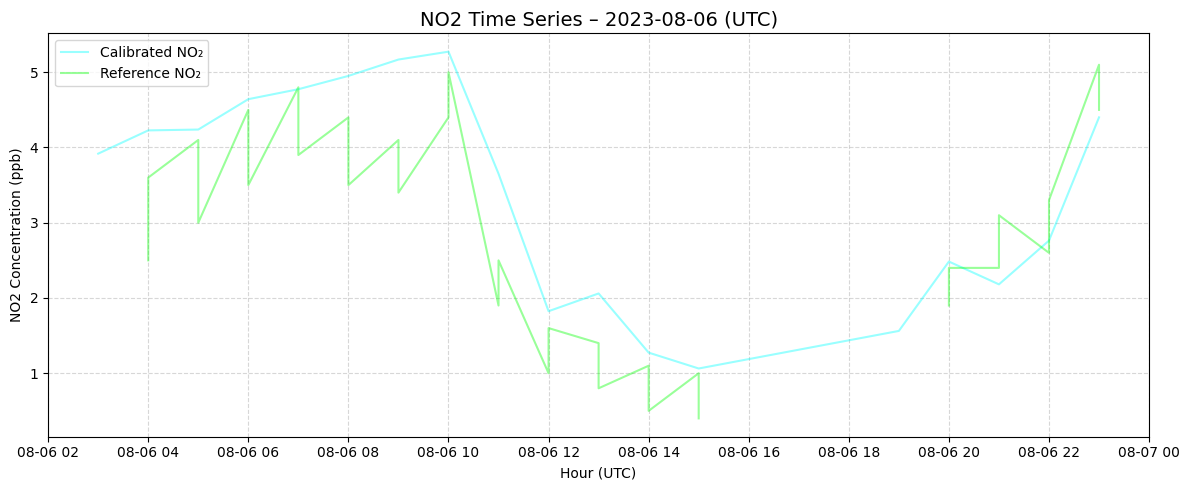

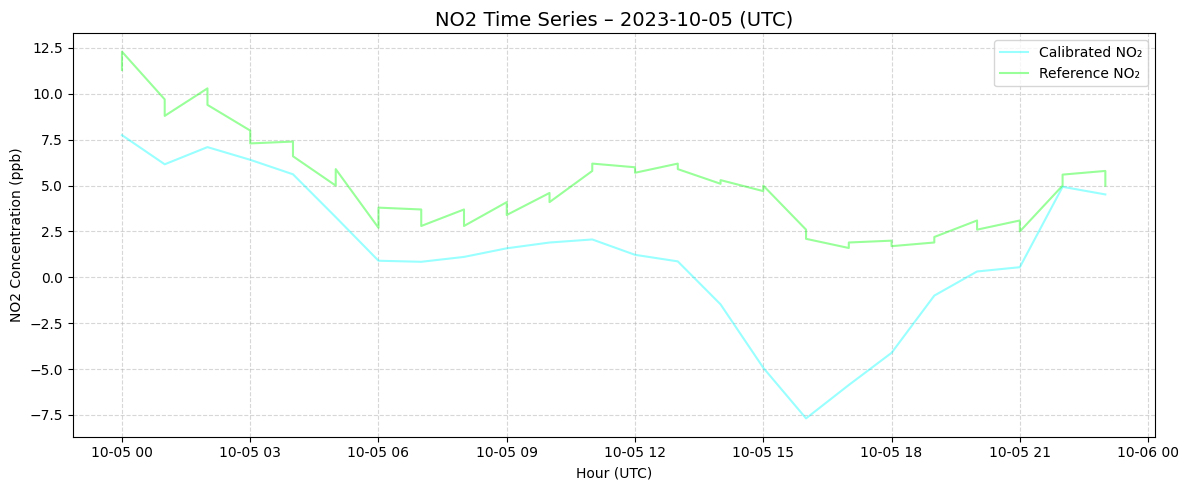

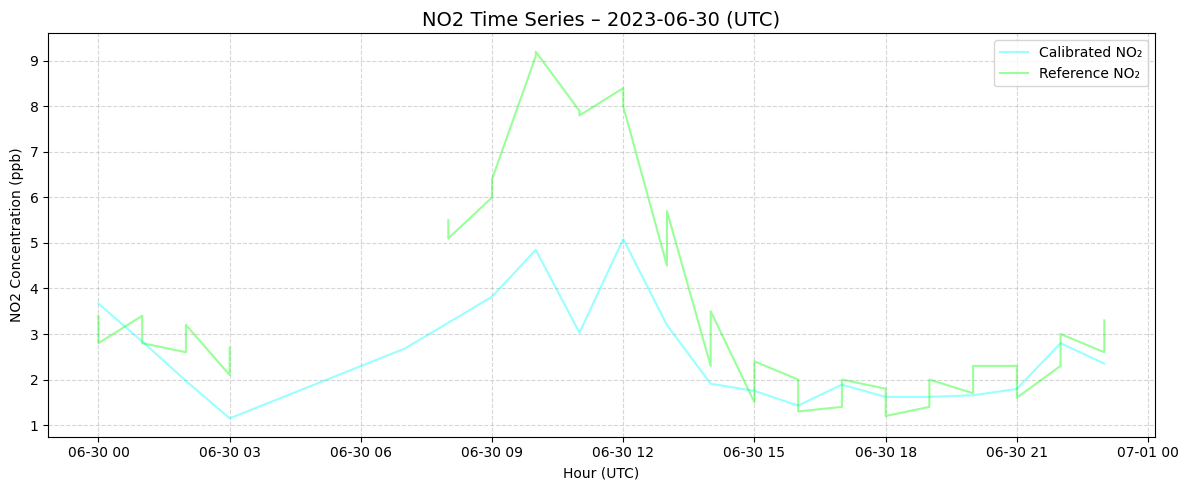

In [43]:
plot_single_day(combined_df, "2023-01-12")
plot_single_day(combined_df, "2023-05-07")
plot_single_day(combined_df, "2023-08-06")
plot_single_day(combined_df, "2023-10-05")
plot_single_day(combined_df, "2023-06-30")

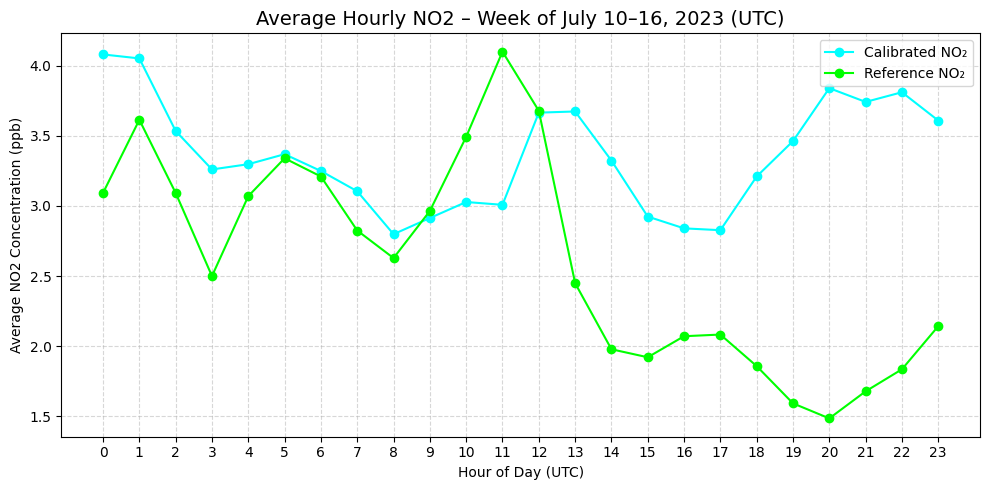

In [44]:
start_date = pd.to_datetime("2023-07-10", utc=True)
end_date = pd.to_datetime("2023-07-17", utc=True)

week_df = combined_df[(combined_df["datetime_utc"] >= start_date) & 
                      (combined_df["datetime_utc"] < end_date)].copy()

week_df["hour"] = week_df["datetime_utc"].dt.hour

avg_by_hour = week_df.groupby("hour")[["250_no2", "true_no2"]].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_by_hour.index, avg_by_hour["250_no2"], marker="o", color="cyan", label="Calibrated NO₂")
plt.plot(avg_by_hour.index, avg_by_hour["true_no2"], marker="o", color="lime", label="Reference NO₂")

plt.title("Average Hourly NO2 – Week of July 10–16, 2023 (UTC)", fontsize=14)
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Average NO2 Concentration (ppb)")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


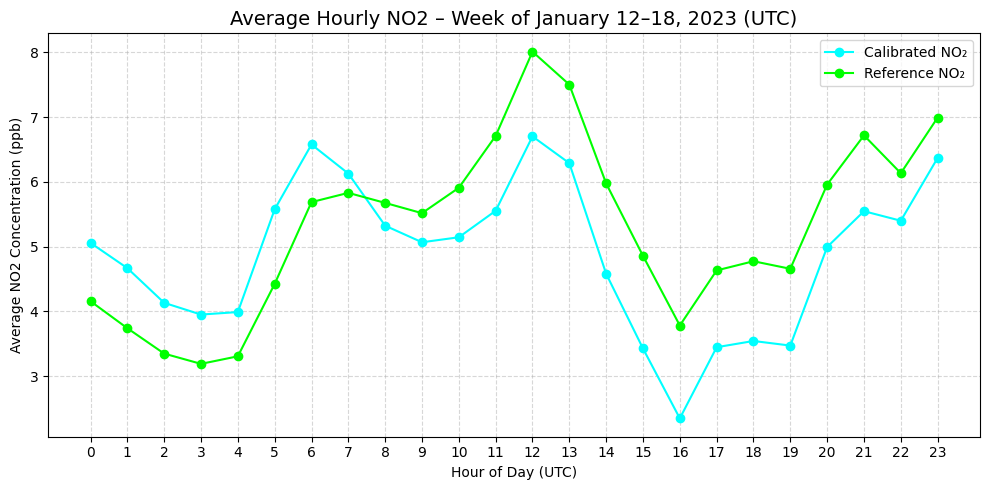

In [45]:
start_date = pd.to_datetime("2023-01-12", utc=True)
end_date = pd.to_datetime("2023-01-18", utc=True)

week_df = combined_df[(combined_df["datetime_utc"] >= start_date) & 
                      (combined_df["datetime_utc"] < end_date)].copy()

week_df["hour"] = week_df["datetime_utc"].dt.hour

avg_by_hour = week_df.groupby("hour")[["250_no2", "true_no2"]].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_by_hour.index, avg_by_hour["250_no2"], marker="o", color="cyan", label="Calibrated NO₂")
plt.plot(avg_by_hour.index, avg_by_hour["true_no2"], marker="o", color="lime", label="Reference NO₂")

plt.title("Average Hourly NO2 – Week of January 12–18, 2023 (UTC)", fontsize=14)
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Average NO2 Concentration (ppb)")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


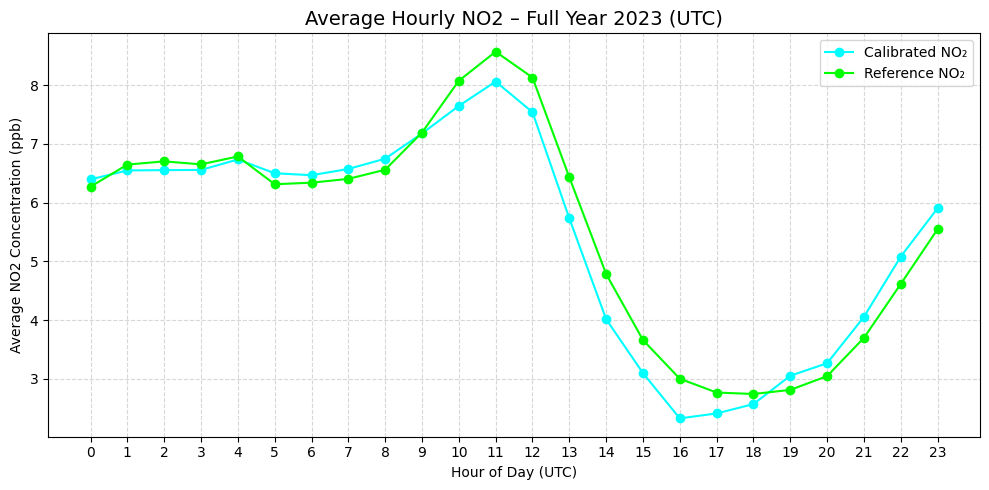

In [46]:
df_2023 = combined_df[
    (combined_df["datetime_utc"] >= "2023-01-01") &
    (combined_df["datetime_utc"] < "2024-01-01")
].copy()

df_2023["hour"] = df_2023["datetime_utc"].dt.hour

avg_hourly = df_2023.groupby("hour")[["250_no2", "true_no2"]].mean()

plt.figure(figsize=(10, 5))
plt.plot(avg_hourly.index, avg_hourly["250_no2"], marker="o", color="cyan", label="Calibrated NO₂")
plt.plot(avg_hourly.index, avg_hourly["true_no2"], marker="o", color="lime", label="Reference NO₂")

plt.title("Average Hourly NO2 – Full Year 2023 (UTC)", fontsize=14)
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Average NO2 Concentration (ppb)")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
metrics_df = combined_df[["250_no2", "true_no2"]].dropna()
y_true = metrics_df["true_no2"]
y_pred = metrics_df["250_no2"]

r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)


In [48]:
results_table = pd.DataFrame({
    "Site": [250],
    "Type": ["RC"],
    "Species": ["NO2"],
    "R²": [round(r2, 2)],
    "RMSE (ppb)": [round(rmse, 2)],
    "MAE (ppb)": [round(mae, 2)]
})

print(results_table)


   Site Type Species    R²  RMSE (ppb)  MAE (ppb)
0   250   RC     NO2  0.83        2.41       1.77


In [49]:
calibrated_no2_allsites.head()

,local_timestamp,251_no2,259_no2,256_no2,265_no2,264_no2,255_no2,271_no2,254_no2,263_no2,...,257_no2,269_no2,258_no2,267_no2,253_no2,274_no2,260_no2,262_no2,266_no2,261_no2
0,2023-01-01 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01 01:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01 02:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01 03:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01 04:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
reference_no2_ep.head()

,latitude,longitude,parameter,date_gmt,time_gmt,true_no2,units_of_measure,sample_duration,detection_limit,state,county,datetime_utc,missing,month,date
0,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-01-01,05:00,4.1,Parts per billion,1 HOUR,0.04,Rhode Island,Providence,2023-01-01 05:00:00+00:00,False,1,2023-01-01
1,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-01-01,05:00,4.6,Parts per billion,1 HOUR,0.05,Rhode Island,Providence,2023-01-01 05:00:00+00:00,False,1,2023-01-01
2,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-01-01,06:00,5.9,Parts per billion,1 HOUR,0.04,Rhode Island,Providence,2023-01-01 06:00:00+00:00,False,1,2023-01-01
3,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-01-01,06:00,6.6,Parts per billion,1 HOUR,0.05,Rhode Island,Providence,2023-01-01 06:00:00+00:00,False,1,2023-01-01
4,41.841039,-71.36097,Nitrogen dioxide (NO2),2023-01-01,07:00,7.4,Parts per billion,1 HOUR,0.04,Rhode Island,Providence,2023-01-01 07:00:00+00:00,False,1,2023-01-01


In [51]:
calibrated_no2_allsites["local_timestamp"] = pd.to_datetime(calibrated_no2_allsites["local_timestamp"], utc=True)
reference_no2_ep["datetime_utc"] = pd.to_datetime(reference_no2_ep["datetime_utc"], utc=True)

calibrated_renamed = calibrated_no2_allsites.rename(columns={"local_timestamp": "datetime_utc"})

reference_avg = (
    reference_no2_ep.groupby("datetime_utc")["true_no2"]
    .mean()
    .reset_index()
)

merged_df = pd.merge(calibrated_renamed, reference_avg, on="datetime_utc", how="left")
merged_df.head()


,datetime_utc,251_no2,259_no2,256_no2,265_no2,264_no2,255_no2,271_no2,254_no2,263_no2,...,269_no2,258_no2,267_no2,253_no2,274_no2,260_no2,262_no2,266_no2,261_no2,true_no2
0,2023-01-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.35
1,2023-01-01 06:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.25
2,2023-01-01 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.75
3,2023-01-01 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.35
4,2023-01-01 09:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.70


In [52]:
results = []

site_columns = [col for col in merged_df.columns if col not in ["datetime_utc", "true_no2"]]

for site in site_columns:
    df_valid = merged_df[["true_no2", site]].dropna()
    
    if df_valid.empty:
        continue

    y_true = df_valid["true_no2"]
    y_pred = df_valid[site]

    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    results.append({
        "Site": site.split("_")[0],
        "Type": "RC",
        "Species": "NO2",
        "R²": round(r2, 2),
        "RMSE (ppb)": round(rmse, 2),
        "MAE (ppb)": round(mae, 2)
    })

results_df = pd.DataFrame(results)

results_df["Site"] = results_df["Site"].astype(int)
results_df = results_df.sort_values(by="Site").reset_index(drop=True)

print(results_df)


    Site Type Species    R²  RMSE (ppb)  MAE (ppb)
0    250   RC     NO2  0.84        2.37       1.75
1    251   RC     NO2  0.50        3.80       2.63
2    252   RC     NO2  0.59        3.85       2.76
3    254   RC     NO2  0.66        3.32       2.39
4    255   RC     NO2  0.67        2.99       2.12
5    256   RC     NO2  0.47        4.21       2.97
6    257   RC     NO2  0.48        4.48       3.16
7    258   RC     NO2  0.67        3.36       2.37
8    259   RC     NO2  0.73        2.85       2.04
9    260   RC     NO2  0.47        4.96       3.70
10   261   RC     NO2  0.57        4.04       2.91
11   262   RC     NO2  0.70        3.45       2.41
12   263   RC     NO2  0.65        3.52       2.54
13   264   RC     NO2  0.62        3.35       2.35
14   265   RC     NO2  0.42        4.63       3.34
15   266   RC     NO2  0.73        2.83       2.00
16   267   RC     NO2  0.70        3.30       2.30
17   268   RC     NO2  0.58        3.95       2.78
18   269   RC     NO2  0.58    

In [53]:
site_columns = [col for col in merged_df.columns if col not in ["datetime_utc", "true_no2"]]

summary_stats = []

for site in site_columns:
    site_data = merged_df[site]
    total_count = len(site_data)
    valid_data = site_data.dropna()
    
    mean_val = valid_data.mean()
    std_val = valid_data.std()
    min_val = valid_data.min()
    max_val = valid_data.max()
    missing_pct = 100 * (site_data.isna().sum() / total_count)
    nonzero_pct = 100 * (valid_data != 0).sum() / len(valid_data) if len(valid_data) > 0 else np.nan
    
    summary_stats.append({
        "Site": site.split("_")[0], #get site number
        "Valid Count": len(valid_data),
        "Total Count": total_count,
        "% Missing": round(missing_pct, 2),
        "Mean": round(mean_val, 2),
        "Std Dev": round(std_val, 2),
        "Min": round(min_val, 2),
        "Max": round(max_val, 2),
        "% Nonzero": round(nonzero_pct, 2)
    })

summary_df = pd.DataFrame(summary_stats)
summary_df["Site"] = summary_df["Site"].astype(int)
summary_df = summary_df.sort_values("Site").reset_index(drop=True)

print(summary_df)


    Site  Valid Count  Total Count  % Missing  Mean  Std Dev     Min    Max  \
0    250         9379        10208       8.12  5.80     5.71   -9.85  42.80   
1    251         6946        10208      31.96  5.06     5.39  -31.47  37.74   
2    252         8484        10208      16.89  5.99     5.17  -23.61  37.54   
3    253          607        10208      94.05  8.43     4.95   -1.50  30.91   
4    254         8858        10208      13.22  5.88     5.33   -7.60  38.68   
5    255         5512        10208      46.00  5.17     4.90   -8.63  35.38   
6    256         8157        10208      20.09  6.31     4.69   -9.27  44.94   
7    257         8500        10208      16.73  6.60     5.36  -15.60  45.89   
8    258         8769        10208      14.10  5.89     5.45  -19.65  39.78   
9    259         2654        10208      74.00  5.10     5.05   -9.13  37.35   
10   260         5597        10208      45.17  8.07     5.59   -9.77  32.60   
11   261         8624        10208      15.52  6.10 

In [54]:
negative_stats = []

site_columns = [col for col in merged_df.columns if col not in ["datetime_utc", "true_no2"]]

for site in site_columns:
    site_data = merged_df[site].dropna()
    total_valid = len(site_data)
    
    if total_valid == 0:
        pct_negative = np.nan
    else:
        pct_negative = 100 * (site_data < 0).sum() / total_valid

    negative_stats.append({
        "Site": int(site.split("_")[0]),
        "% Negative (< 0)": round(pct_negative, 2)
    })

negative_df = pd.DataFrame(negative_stats).sort_values("Site").reset_index(drop=True)

print(negative_df)


    Site  % Negative (< 0)
0    250              4.66
1    251              9.27
2    252              5.79
3    253              0.49
4    254              3.50
5    255              5.15
6    256              2.38
7    257              4.21
8    258              5.10
9    259              5.61
10   260              4.32
11   261              7.93
12   262              6.24
13   263              3.16
14   264              6.58
15   265              5.34
16   266              5.50
17   267              4.89
18   268              3.42
19   269              8.26
20   270              3.66
21   271              0.21
22   272              5.63
23   274              4.64
24   276              2.43


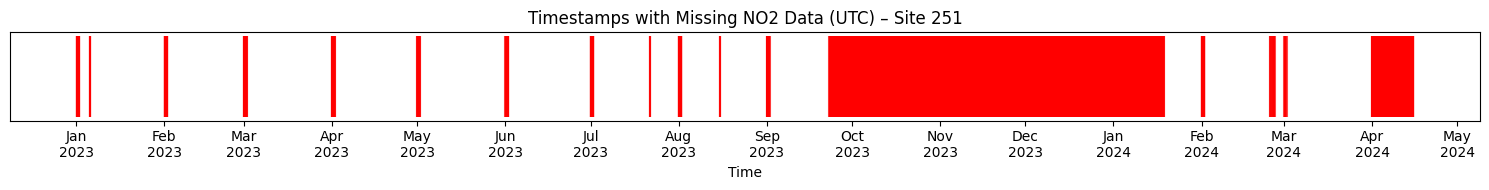

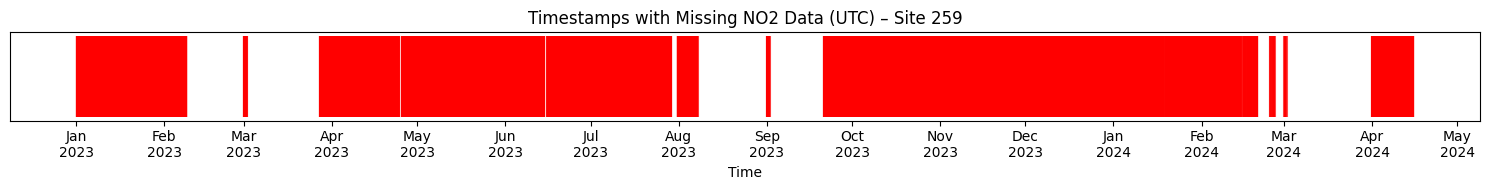

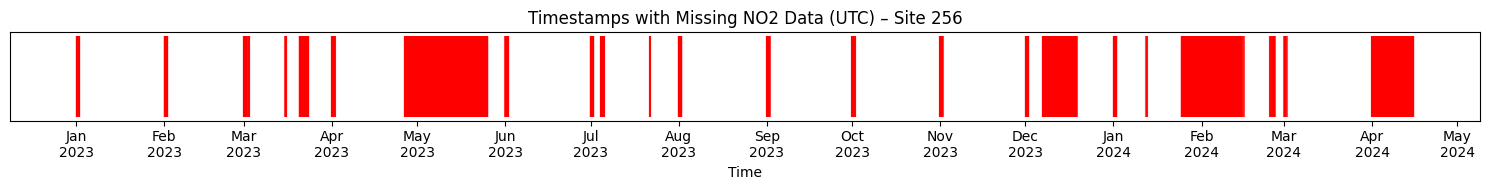

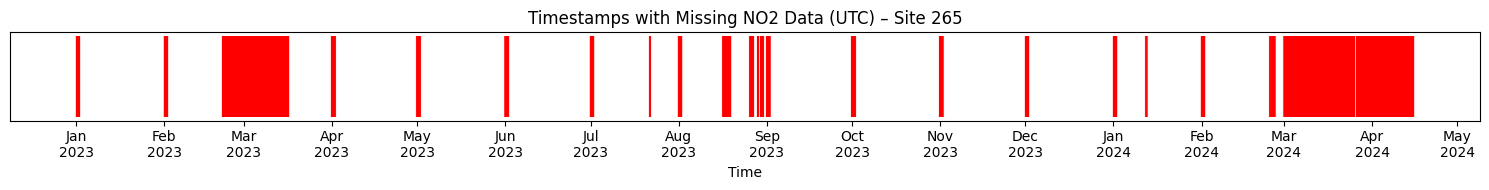

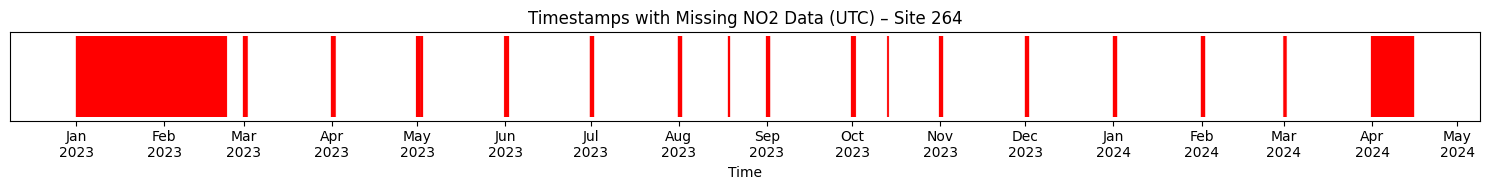

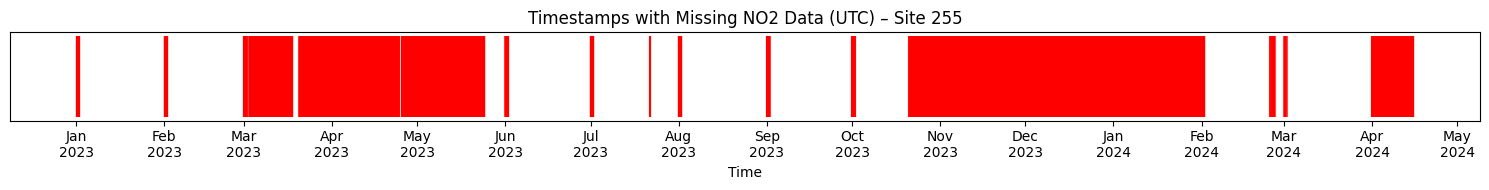

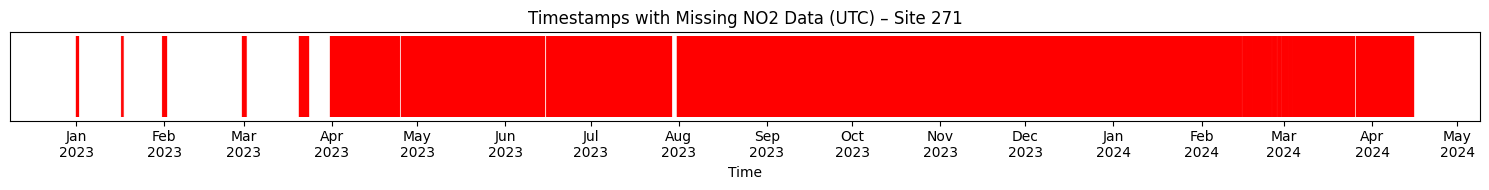

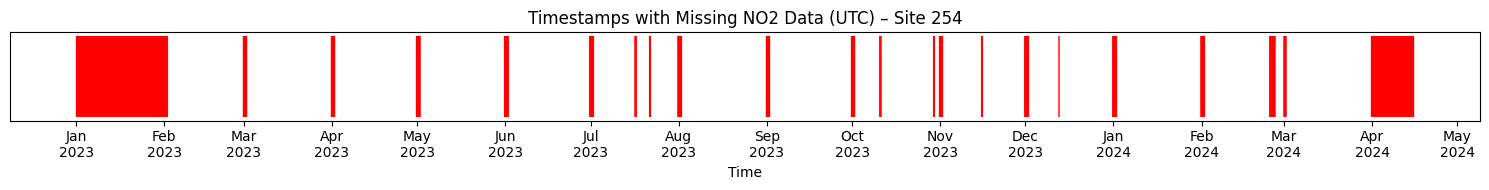

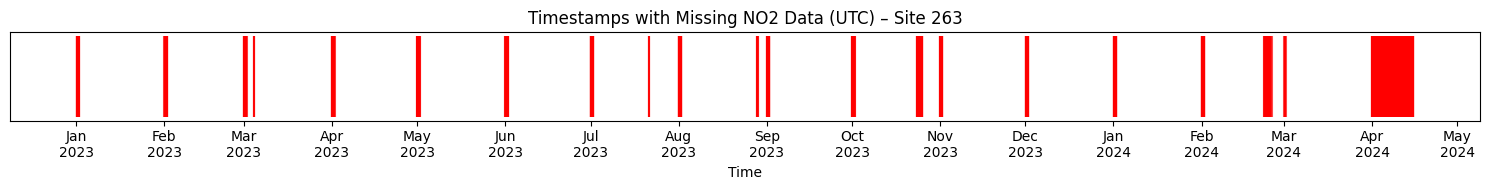

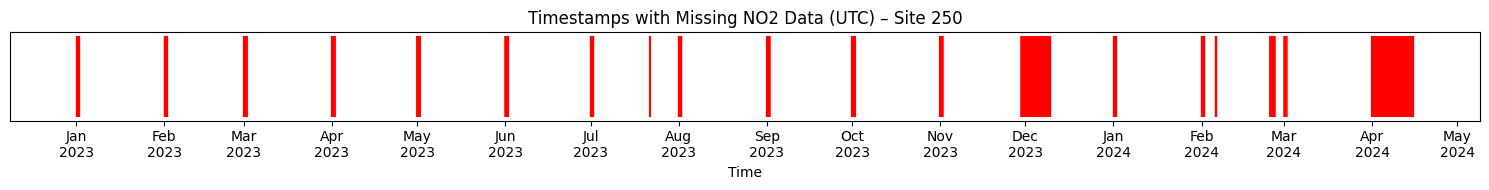

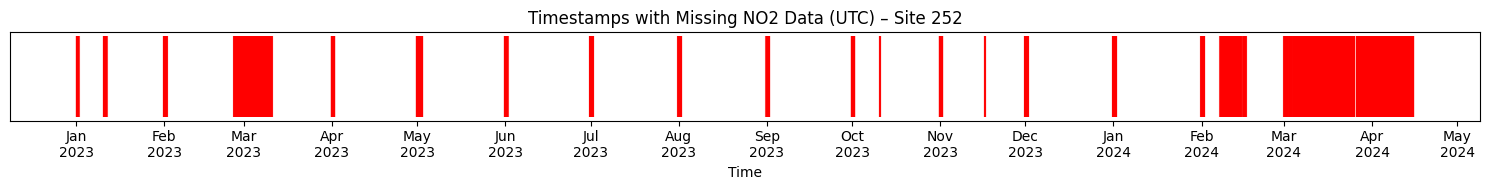

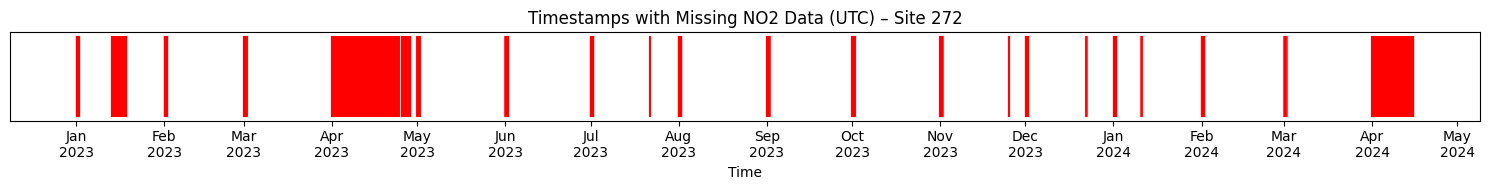

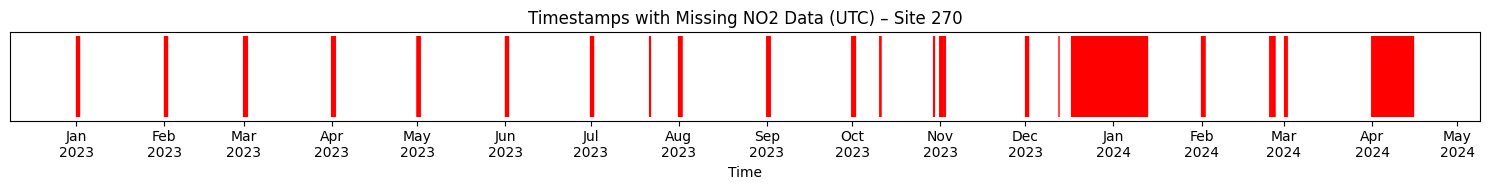

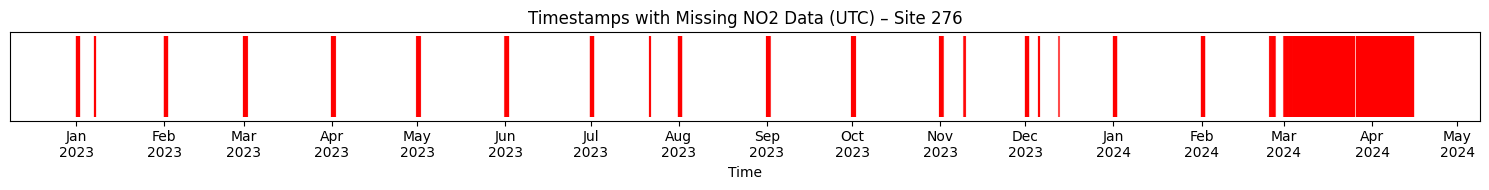

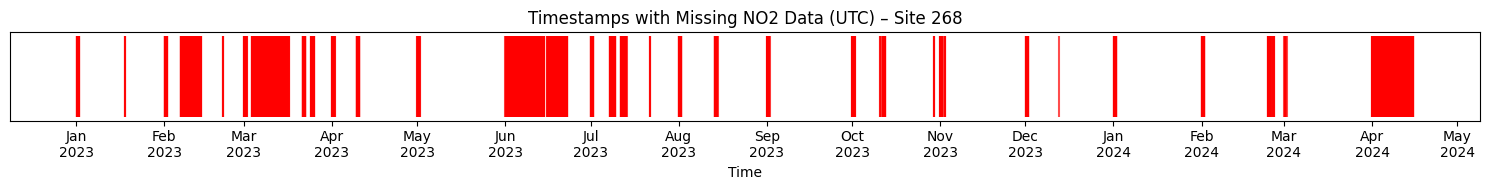

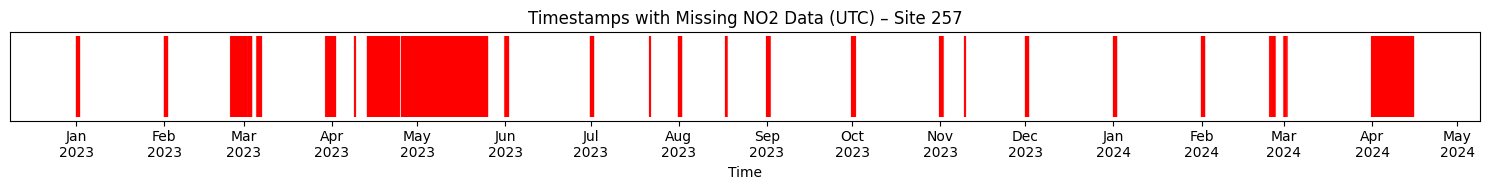

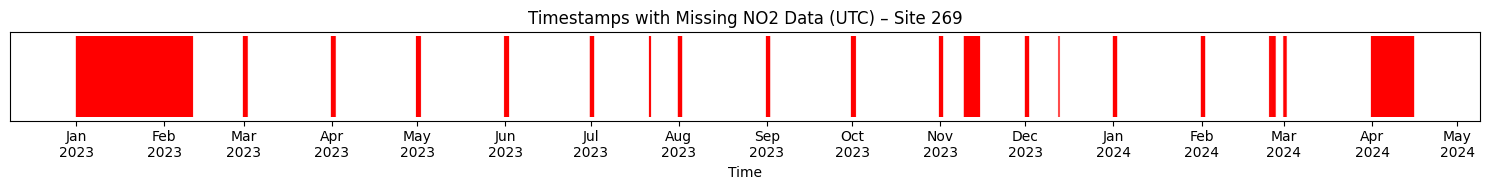

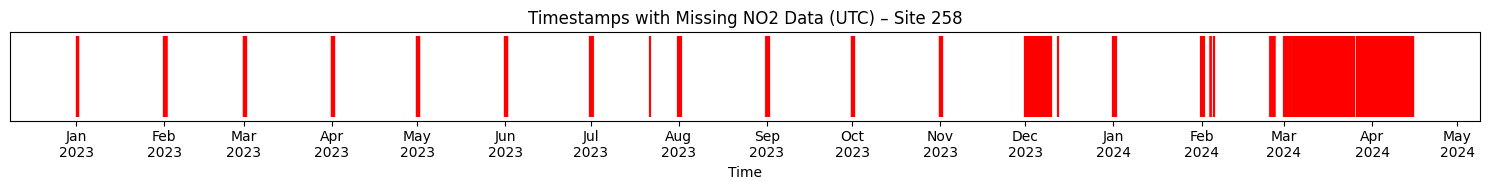

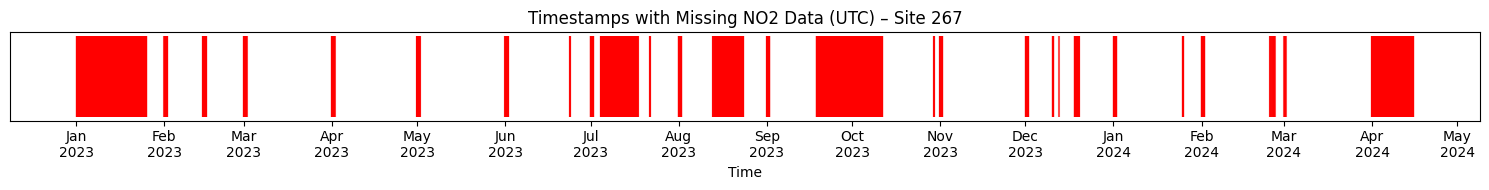

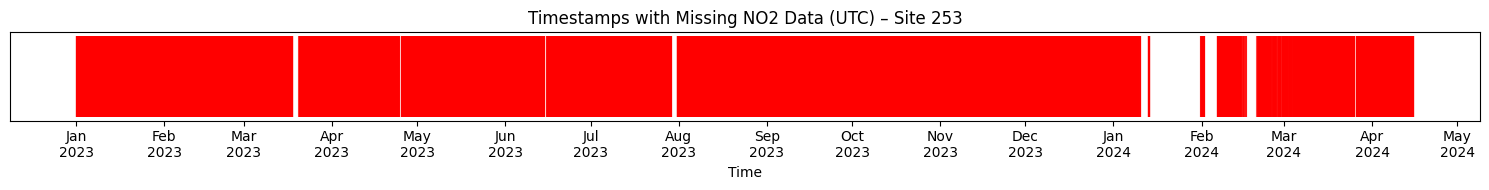

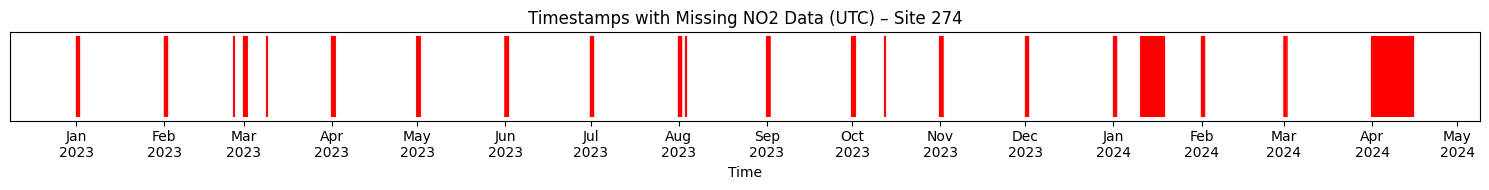

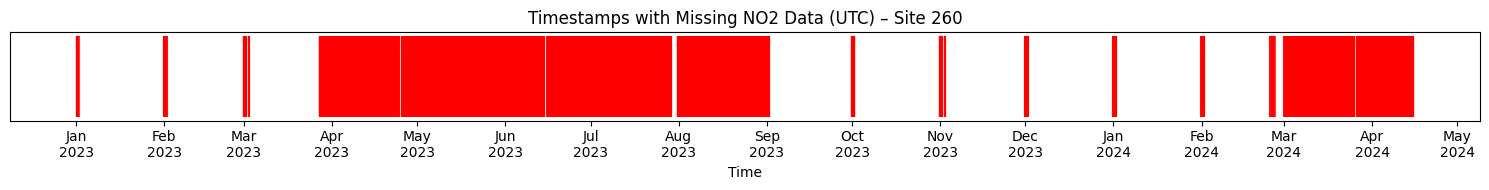

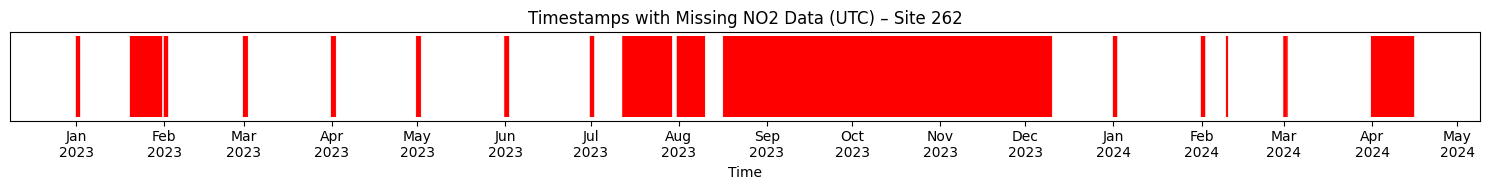

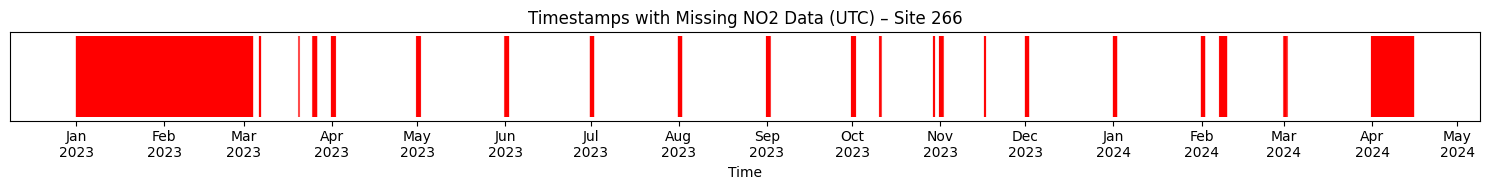

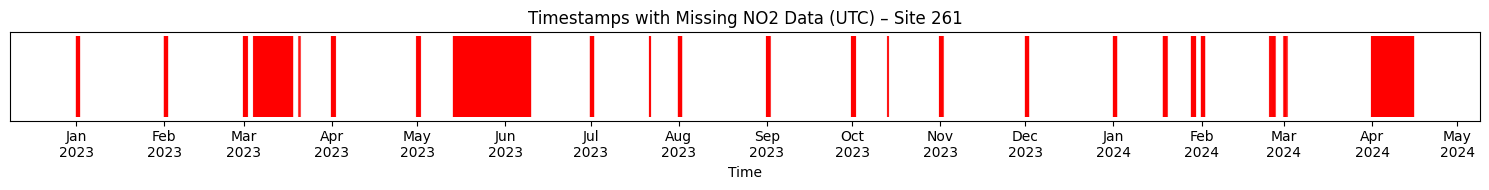

In [62]:
for site in site_columns:
    site_data = merged_df[["datetime_utc", site]].copy()
    site_data["missing"] = site_data[site].isna()
    
    missing_times = site_data.loc[site_data["missing"], "datetime_utc"]

    plt.figure(figsize=(15, 2))
    plt.vlines(missing_times, ymin=0, ymax=1, color="red", alpha=0.7)
    plt.title(f"Timestamps with Missing NO2 Data (UTC) – Site {site.split('_')[0]}")
    plt.yticks([])
    plt.xlabel("Time")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    plt.tight_layout()
    plt.show()